# Flashpoints Ukraine Dataset (FUD) Construction Notebook

This notebook outlines the initial exploration surrounding, and ultimately the creation of, the Flashpoints Ukraine Dataset (FUD). The FUD is an amalgamation and subsequent enrichment of three high-quality, curated datasets: 
- Armed Conflict Location & Event Data (ACLED) Ukraine reporting, https://acleddata.com/
- The Humanitarian Data Exchange's Ukraine Subnational Adminstrative Boundaries dataset, https://data.humdata.org/dataset/cod-ab-ukr
- NASA Fire Information for Resource Management System (FIRMS), https://www.earthdata.nasa.gov/data/tools/firms

The FUD is intended to enable experimentation with conflict event prediction in the Ukraine through analysis of labeled thermal anomaly data. 

# Tributary Datasets

Use a subset of the data to expedite iteration and working up to the final dataset. 

In [1]:
sample_percent = 0.03

## Administrative Boundaries

Admin boundaries sourced from humanitarian data exchange: https://data.humdata.org/dataset/cod-ab-ukr

In [2]:
import fiona
import pandas as pd
import geopandas
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
ukraine_admin_gdb = "ukr_admbnd_sspe_20240416_AB_GDB.gdb"

layers = fiona.listlayers(ukraine_admin_gdb)
layers

['ukr_admbndt_adminUnitLookup',
 'ukr_admbndp_adm0123_sspe_itos_20240416',
 'ukr_admbndl_adm0123_sspe_itos_20240416',
 'ukr_admbnda_adm4_sspe_20240416',
 'ukr_admbnda_adm3_sspe_20240416',
 'ukr_admbnda_adm2_sspe_20240416',
 'ukr_admbnda_adm1_sspe_20240416',
 'ukr_admbnda_adm0_sspe_20240416']

In [4]:
for i, layer in enumerate(layers): 
    admin = geopandas.read_file(ukraine_admin_gdb, layer=i)
    print(i, layer) 

0 ukr_admbndt_adminUnitLookup
1 ukr_admbndp_adm0123_sspe_itos_20240416
2 ukr_admbndl_adm0123_sspe_itos_20240416
3 ukr_admbnda_adm4_sspe_20240416
4 ukr_admbnda_adm3_sspe_20240416
5 ukr_admbnda_adm2_sspe_20240416
6 ukr_admbnda_adm1_sspe_20240416
7 ukr_admbnda_adm0_sspe_20240416


/Users/jason/Local/school/venv/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [5]:
ukraine_level_4_lyr = 3
ukraine_level_3_lyr = 4
ukraine_level_2_lyr = 5
ukraine_level_1_lyr = 6
ukraine_level_0_lyr = 7

ukr_admin_l4 = geopandas.read_file(ukraine_admin_gdb, layer=ukraine_level_4_lyr)
ukr_admin_l3 = geopandas.read_file(ukraine_admin_gdb, layer=ukraine_level_3_lyr)
ukr_admin_l2 = geopandas.read_file(ukraine_admin_gdb, layer=ukraine_level_2_lyr)
ukr_admin_l1 = geopandas.read_file(ukraine_admin_gdb, layer=ukraine_level_1_lyr)
ukr_admin_l0 = geopandas.read_file(ukraine_admin_gdb, layer=ukraine_level_0_lyr)

<Axes: >

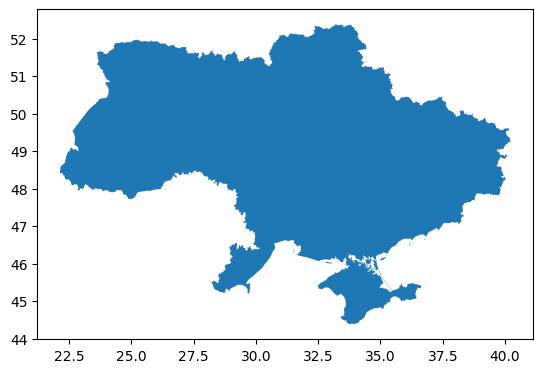

In [6]:
ukr_admin_l0.plot()

<Axes: >

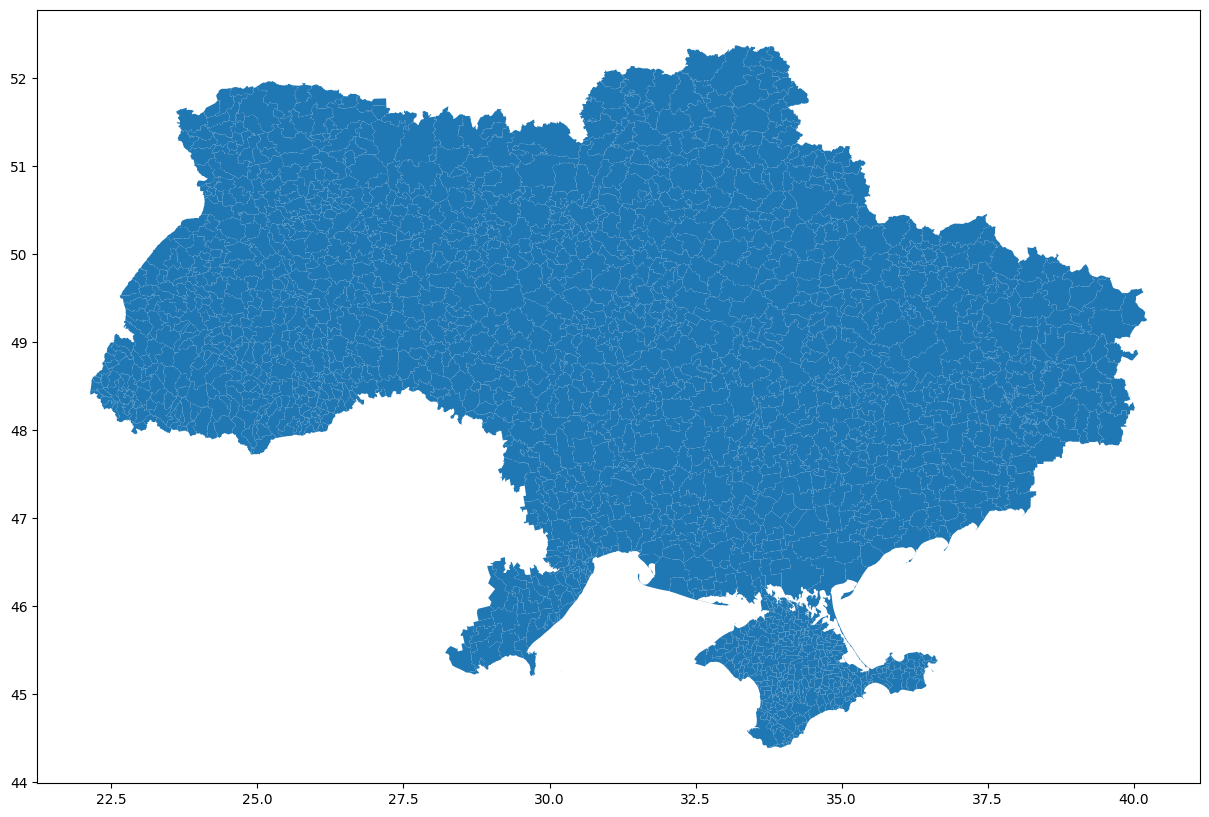

In [7]:
ukr_admin_l3.plot(figsize=(15,15))

<Axes: >

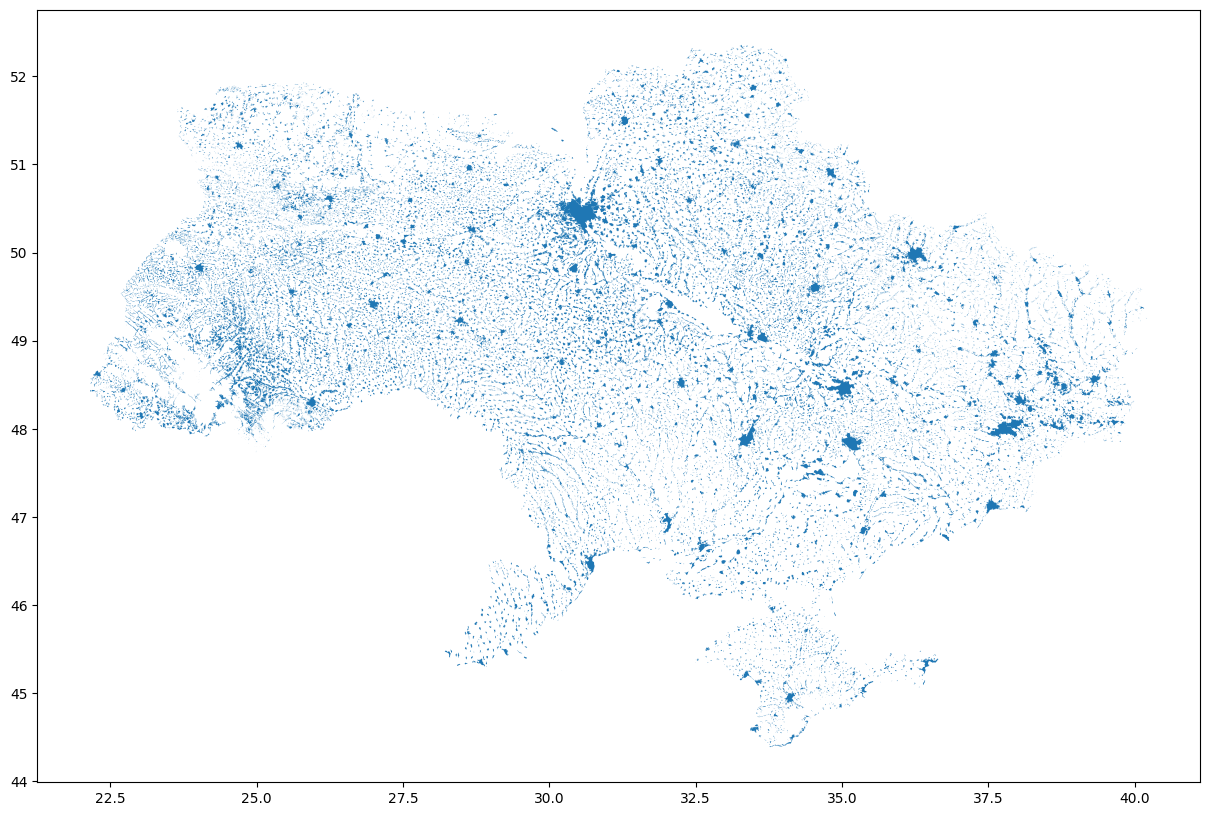

In [8]:
ukr_admin_l4.plot(figsize=(15,15))

In [9]:
display(ukr_admin_l4.head(1))
display(ukr_admin_l3.head(1))
display(ukr_admin_l2.head(1))
display(ukr_admin_l1.head(1))

ADM4_EN    ADM4_UA    ADM4_RU    ADM4_PCODE     ADM3_EN      ADM3_UA  \
0  Andriivka  Андріївка  Андреевка  UA0102001001  Sevastopol  Севастополь   

       ADM3_RU ADM3_PCODE           ADM2_EN          ADM2_UA  ...  ADM0_UA  \
0  Севастополь  UA0102001  Bakhchysaraiskyi  Бахчисарайський  ...  Україна   

   ADM0_RU ADM0_PCODE                      date                   validOn  \
0  Украина         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00   

  validTo AREA_SQKM Shape_Length Shape_Area  \
0     NaT  0.951838     0.051272   0.000108   

                                            geometry  
0  MULTIPOLYGON (((33.56765 44.81089, 33.56633 44...  

[1 rows x 27 columns]

ADM3_EN        ADM3_UA        ADM3_RU ADM3_PCODE           ADM2_EN  \
0  Aromatnenska  Ароматненська  Ароматненский  UA0102003  Bakhchysaraiskyi   

           ADM2_UA         ADM2_RU ADM2_PCODE                        ADM1_EN  \
0  Бахчисарайський  Бахчисарайский     UA0102  Autonomous Republic of Crimea   

                     ADM1_UA  ...  ADM0_UA  ADM0_RU ADM0_PCODE  \
0  Автономна Республіка Крим  ...  Україна  Украина         UA   

                       date                   validOn validTo  AREA_SQKM  \
0 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT  89.952323   

  Shape_Length Shape_Area                                           geometry  
0     0.711181   0.010231  MULTIPOLYGON (((33.86739 44.84984, 33.86835 44...  

[1 rows x 23 columns]

ADM2_EN          ADM2_UA         ADM2_RU ADM2_PCODE  \
0  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский     UA0102   

                         ADM1_EN                    ADM1_UA  \
0  Autonomous Republic of Crimea  Автономна Республіка Крим   

                      ADM1_RU ADM1_PCODE  ADM0_EN  ADM0_UA  ADM0_RU  \
0  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   

  ADM0_PCODE                      date                   validOn validTo  \
0         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   

     AREA_SQKM  Shape_Length  Shape_Area  \
0  2381.307249      3.859768    0.270186   

                                            geometry  
0  MULTIPOLYGON (((34.28075 44.76307, 34.27738 44...

ADM1_EN                    ADM1_UA  \
0  Autonomous Republic of Crimea  Автономна Республіка Крим   

                      ADM1_RU ADM1_PCODE  ADM0_EN  ADM0_UA  ADM0_RU  \
0  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   

  ADM0_PCODE                      date                   validOn validTo  \
0         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   

      AREA_SQKM  Shape_Length  Shape_Area  \
0  25558.451568     25.522335     2.93151   

                                            geometry  
0  MULTIPOLYGON (((33.68295 46.2083, 33.68253 46....

In [10]:
ukr_admin_l4.count()

ADM4_EN         29707
ADM4_UA         29707
ADM4_RU         29707
ADM4_PCODE      29707
ADM3_EN         29707
ADM3_UA         29707
ADM3_RU         29707
ADM3_PCODE      29707
ADM2_EN         29707
ADM2_UA         29707
ADM2_RU         29707
ADM2_PCODE      29707
ADM1_EN         29707
ADM1_UA         29707
ADM1_RU         29707
ADM1_PCODE      29707
ADM0_EN         29707
ADM0_UA         29707
ADM0_RU         29707
ADM0_PCODE      29707
date            29707
validOn         29707
validTo             0
AREA_SQKM       29707
Shape_Length    29707
Shape_Area      29707
geometry        29707
dtype: int64

## NASA FIRMS

From https://firms.modaps.eosdis.nasa.gov/: 
> The Fire Information for Resource Management System (FIRMS) distributes Near Real-Time (NRT) active fire data from the Moderate Resolution Imaging Spectroradiometer (MODIS) aboard the Aqua and Terra satellites, and the Visible Infrared Imaging Radiometer Suite (VIIRS) aboard S-NPP, NOAA 20 and NOAA 21 (formally known as JPSS-1 and JPSS-2). Globally these data are available within 3 hours of satellite observation, but for the US and Canada active fire detections are available in real-time.

### Readme


```
========================================================
README: NASA FIRMS MODIS or VIIRS Fire/Hotspot Data Download
========================================================

If you requested data from multiple instruments e.g. MODIS (combined Aqua and Terra) and VIIRS (S-NPP and/or NOAA-20), you will receive an email, with download link, for each data source.

This zip file will have either one, two or three naming conventions beginning with:
    DL_FIRE_M-C61_xxxx if you requested MODIS data (M6 stands for MODIS Collection 6), or 
    DL_FIRE_J1V-C2_xxx if you requested VIIRS 375m data from  NOAA-20(JPSS-1)
    DL_FIRE_J2V-C2_xxx if you requested VIIRS 375m data from  NOAA-21(JPSS-2)
    DL_FIRE_SV-C2_xxxx if you requested VIIRS 375m data from S-NPP


The xx refers to the download request id/number. The zip file contains the data
for the requested dates in your area-of-interest.

If you requested the data in shape file format you will see the following files
contained in your zip:
    fire_xx.dbf
    fire_xx.prj
    fire_xx.shp
    fire_xx.shx
    fire_xx.cpg
    Readme.txt

If you requested the data in CSV format the file name will look like this: 
    fire_.xx.csv
    Readme.txt

Depending on the date range selected you may receive 1 or 2 files containing
Near Real-Time (NRT) data and/or older standard/science quality data. NRT data
are replaced with standard quality data when they are available (usually with
a 2-3 month lag).

-- fire_nrt_M-C61_xx = MODIS NRT files:(MCD14DL) MODIS Active Fire and Thermal Anomalies
                    product processed by LANCE / FIRMS

-- fire_nrt_SV-C2_xx = VIIRS 375m NRT files:(VNP14IMGTDL) VIIRS Active Fire and Thermal
                    Anomalies product from S-NPP processed by LANCE / FIRMS

-- fire_nrt_J1V-C2_xx = VIIRS 375m NRT files:(VJ114IMGDL) VIIRS Active Fire and Thermal
                    Anomalies product from NOAA-20 (JPSS-1) processed by LANCE / FIRMS

-- fire_nrt_J2V-C2_xx = VIIRS 375m NRT files:(VJ214IMGDL) VIIRS Active Fire and Thermal
                    Anomalies product from NOAA-21 (JPSS-2) processed by LANCE / FIRMS

-- fire_archive_M-C61_xx = MODIS standard quality Thermal Anomalies / Fire locations 
                        processed by the University of Maryland with a 3-month
                        lag and distributed by FIRMS. These standard data (MCD14ML) 
                        replace the NRT (MCD14DL) files when available.

-- fire_archive_SV-C2_xx = VIIRS 375m standard Active Fire and Thermal Anomalies product
                        processed by the University of Maryland with a 3-month lag and
                        distributed by FIRMS. These standard data (VNP14IMGTML) replace
                        the NRT files (VNP14IMGTDL ) when available.

PLEASE NOTE the standard quality data is not yet available from FIRMS for NOAA-20

For a list of attribute fields for the MODIS data: 
  https://go.nasa.gov/3JSgbdb

For a list of attribute fields for the VIIRS data: 
  https://go.nasa.gov/3sf3ALb

For the key differences between the NRT and standard products visit:   
https://earthdata.nasa.gov/faq/firms-faq#ed-nrt-standard.
  
The MODIS and VIIRS fire files are split to ensure users clearly distinguish between 
these two data sources. Should you wish to combine the datasets you will still be 
able to distinguish the source using the Collection / Version field. 

Please note: If your request results in no fire points, the accompanying ZIP file 
will include an empty CSV file with a header, or an empty DBF file. If you believe 
that this has occurred due to an error, please contact us at support@earthdata.nasa.gov.

Visit the NASA FIRMS project website at http://earthdata.nasa.gov/data/nrt-data/firms

========================
PROJECTION INFORMATION
========================
The MODIS and VIIRS fire/hotspot data supplied to you are in the WGS84 Geographic 
projection (the "latitude/longitude projection"). 

==========
IMPORTANT
==========
For further information, please refer to the latest version of the MODIS Fire Users
Guide which can be found via the FIRMS FAQ section (https://earthdata.nasa.gov/faq#ed-firms-faq).

Please note that there is MODIS data missing from several of the data sets. There is 
data missing from end of June to the beginning of July in 2001, 2002 is missing some 
data throughout the data set, 2007 has some missing data from mid August and data is 
missing for part of 21 April 2009, and missing for 22 April 2009. There might also be 
some erroneous data present in the data set. 

Please refer to the disclaimer below.

==============================
DATA CITATION AND DISCLAIMER
==============================
NASA promotes the full and open sharing of all data with the research and applications
communities, private industry, academia, and the general public. Read the NASA Data and
Information Policy. 

If you provide the LANCE / FIRMS data to a third party, we request you follow the
guidelines in the citation and replicate or provide a link to the disclaimer.

CITATION
See: https://earthdata.nasa.gov/earth-observation-data/near-real-time/citation#ed-firms-citation 

DISCLAIMER
The LANCE system is operated by the NASA/GSFC Earth Science Data and Information
System (ESDIS). The information presented through LANCE, Rapid Response, GIBS,
Worldview, and FIRMS are provided "as is" and users bear all responsibility and
liability for their use of data, and for any loss of business or profits, or for
any indirect, incidental or consequential damages arising out of any use of, or
inability to use, the data, even if NASA or ESDIS were previously advised of the
possibility of such damages, or for any other claim by you or any other person.
ESDIS makes no representations or warranties of any kind, express or implied,
including implied warranties of fitness for a particular purpose or merchantability,
or with respect to the accuracy of or the absence or the presence or defects or
errors in data, databases of other information. The designations employed in the
data do not imply the expression of any opinion whatsoever on the part of ESDIS
concerning the legal or development status of any country, territory, city or area
or of its authorities, or concerning the delimitation of its frontiers or boundaries.
For more information please contact Earthdata Support.
```

### MODIS 

From https://modis.gsfc.nasa.gov/data/: 
>The MODIS instrument is operating on both the Terra and Aqua spacecraft.  It has a viewing swath width of 2,330 km and views the entire surface of the Earth every one to two days. Its detectors measure 36 spectral bands between 0.405 and 14.385 µm, and it acquires data at three spatial resolutions -- 250m, 500m, and 1,000m.

MODIS : Moderate Resolution Imaging Spectroradiometer 

Latency - defined as time since satellite observation and the data being available in FIRMS:
within 3 hours for global data and
within 1-30 minutes for ultra and real-time in the US and Canada (see 'version' in attribute table below).

The MODIS Fire and Thermal Anomalies layer shows active fire detections and thermal anomalies, such as volcanoes, and gas flares. Fires can be set naturally, such as by lightning, or by humans, whether intentionally or accidentally. The fire layer is useful for studying the spatial and temporal distribution of fire, to locate persistent hot spots such as volcanoes and gas flares, to locate the source of air pollution from smoke that may have adverse human health impacts.

The MODIS Fire and Thermal Anomalies product is available from the Terra (MOD14) and Aqua (MYD14) satellites as well as a combined Terra and Aqua (MCD14) satellite product. The sensor resolution is 1 km, and the temporal resolution is daily. The thermal anomalies are represented as red points (approximate center of a 1 km pixel). Terra's orbit around the Earth is timed so that it passes from north to south across the equator in the morning, while Aqua passes south to north over the equator in the afternoon.

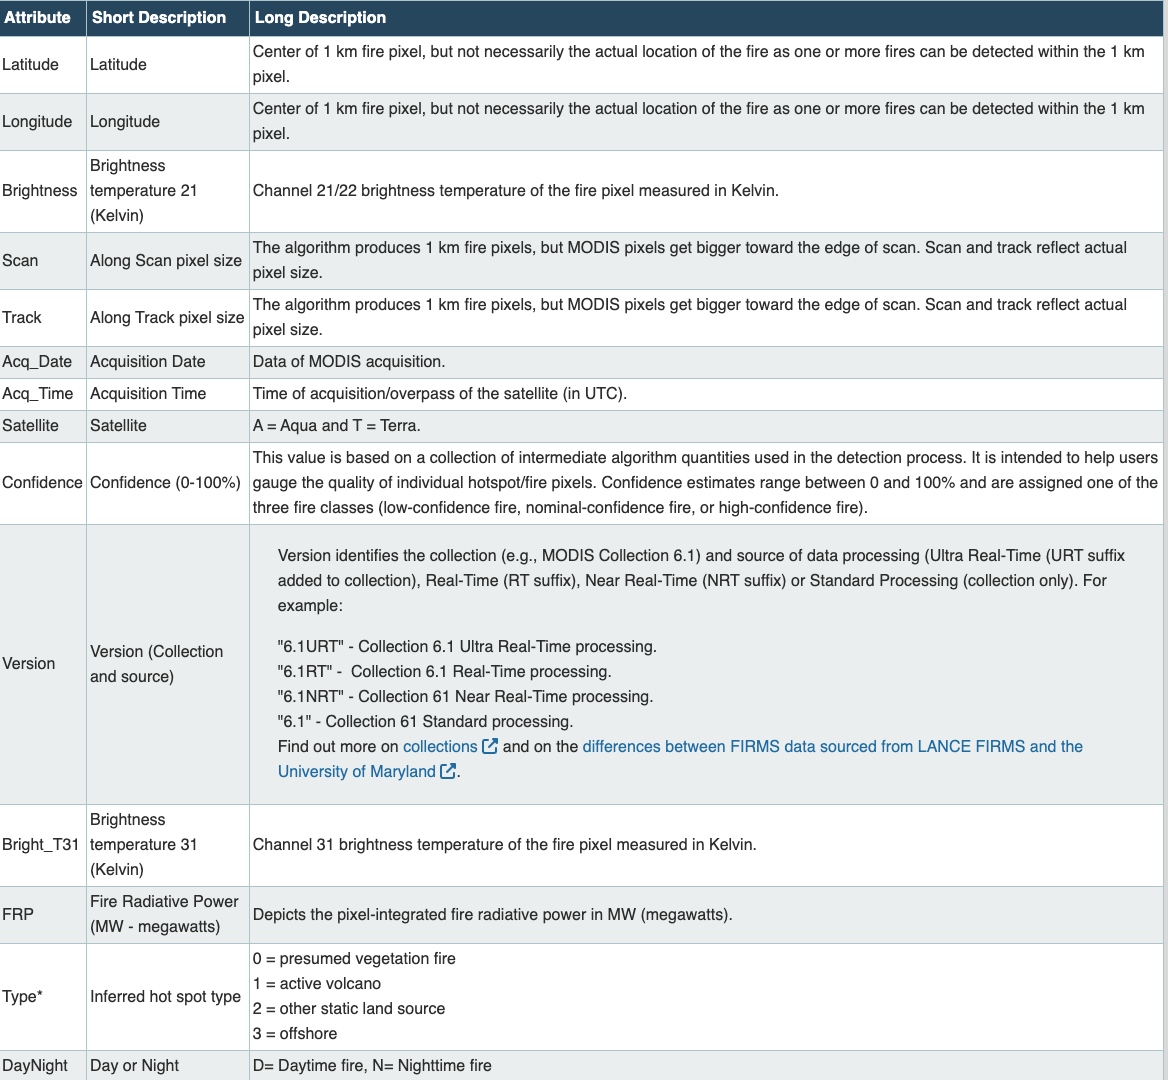

MODIS notes: 

From https://modis-fire.umd.edu/files/MODIS_C6_C6.1_Fire_User_Guide_1.0.pdf: 
- MODIS routinely detects flaming and smoldering fires ~1000m2 in size, and in good conditions 100m2 ... this is a relatively large area
- MODIS won't detect fires if it they aren't burning when it passes
    - ❓ How often does MODIS pass over Ukraine?
- MODIS may not detect when there is cloud cover etc
- Fire pixels aren't necessarily the most appropriate source of fire-related information: fire pixesl contain no info about cloud cover or missing data -- you can derive misleading or incorrect results by ignoring these other pixels ... in many cases it's more appropriate to use one one of the 1km level 3 or CMG fire products
    - ❓ which products did we download? what else do we need and which is the most appropriate? how do we merge VIIRs and MODIS information?

### VIIRS

Latency - defined as time since satellite observation and the data being available in FIRMS:
within 3 hours for global data and
within 1-30 minutes for ultra and real-time in the US and Canada (see 'version' in attribute table below).

The VIIRS (Visible Infrared Imaging Radiometer Suite) Fire layer shows active fire detections and thermal anomalies, such as volcanoes, and gas flares. The fire layer is useful for studying the spatial and temporal distribution of fire, to locate persistent hot spots such as volcanoes and gas flares, to locate the source of air pollution from smoke that may have adverse human health impacts.

VIIRS is the successor to MODIS for Earth science data product generation. The 375m I-band data complements the MODIS fire detections; they both show good agreement in hotspot detection but the improved spatial resolution of the 375m data provides a greater response over fires of relatively small areas and provides improved mapping of large fire perimeters. The 375m data also has improved nighttime performance. Consequently, these data are well suited for use in support of fire management (e.g., near real-time alert systems), as well as other science applications requiring improved fire mapping fidelity.

The VIIRS Fire and Thermal Anomalies product is available from the joint NASA/NOAA Suomi-National Polar orbiting Partnership (S-NPP), NOAA-20 (JPSS-1) and NOAA-21 (JPSS-2) satellites. The sensor resolution is 375 m, imagery resolution is 250 m, and the temporal resolution is twice daily. The thermal anomalies are represented as red points (approximate center of a 375m pixel). The nominal (equator-crossing) observation times for VIIRS S-NPP are 1:30pm and 1:30am. The orbit of NOAA-21 is about 50 minutes ahead of NOAA-20 with S-NPP orbiting between them. Consequently, all three sensors conduct observations within approximately 1 hour of one another. Thanks to its polar orbit, mid-latitudes will experience 3-4 looks a day.

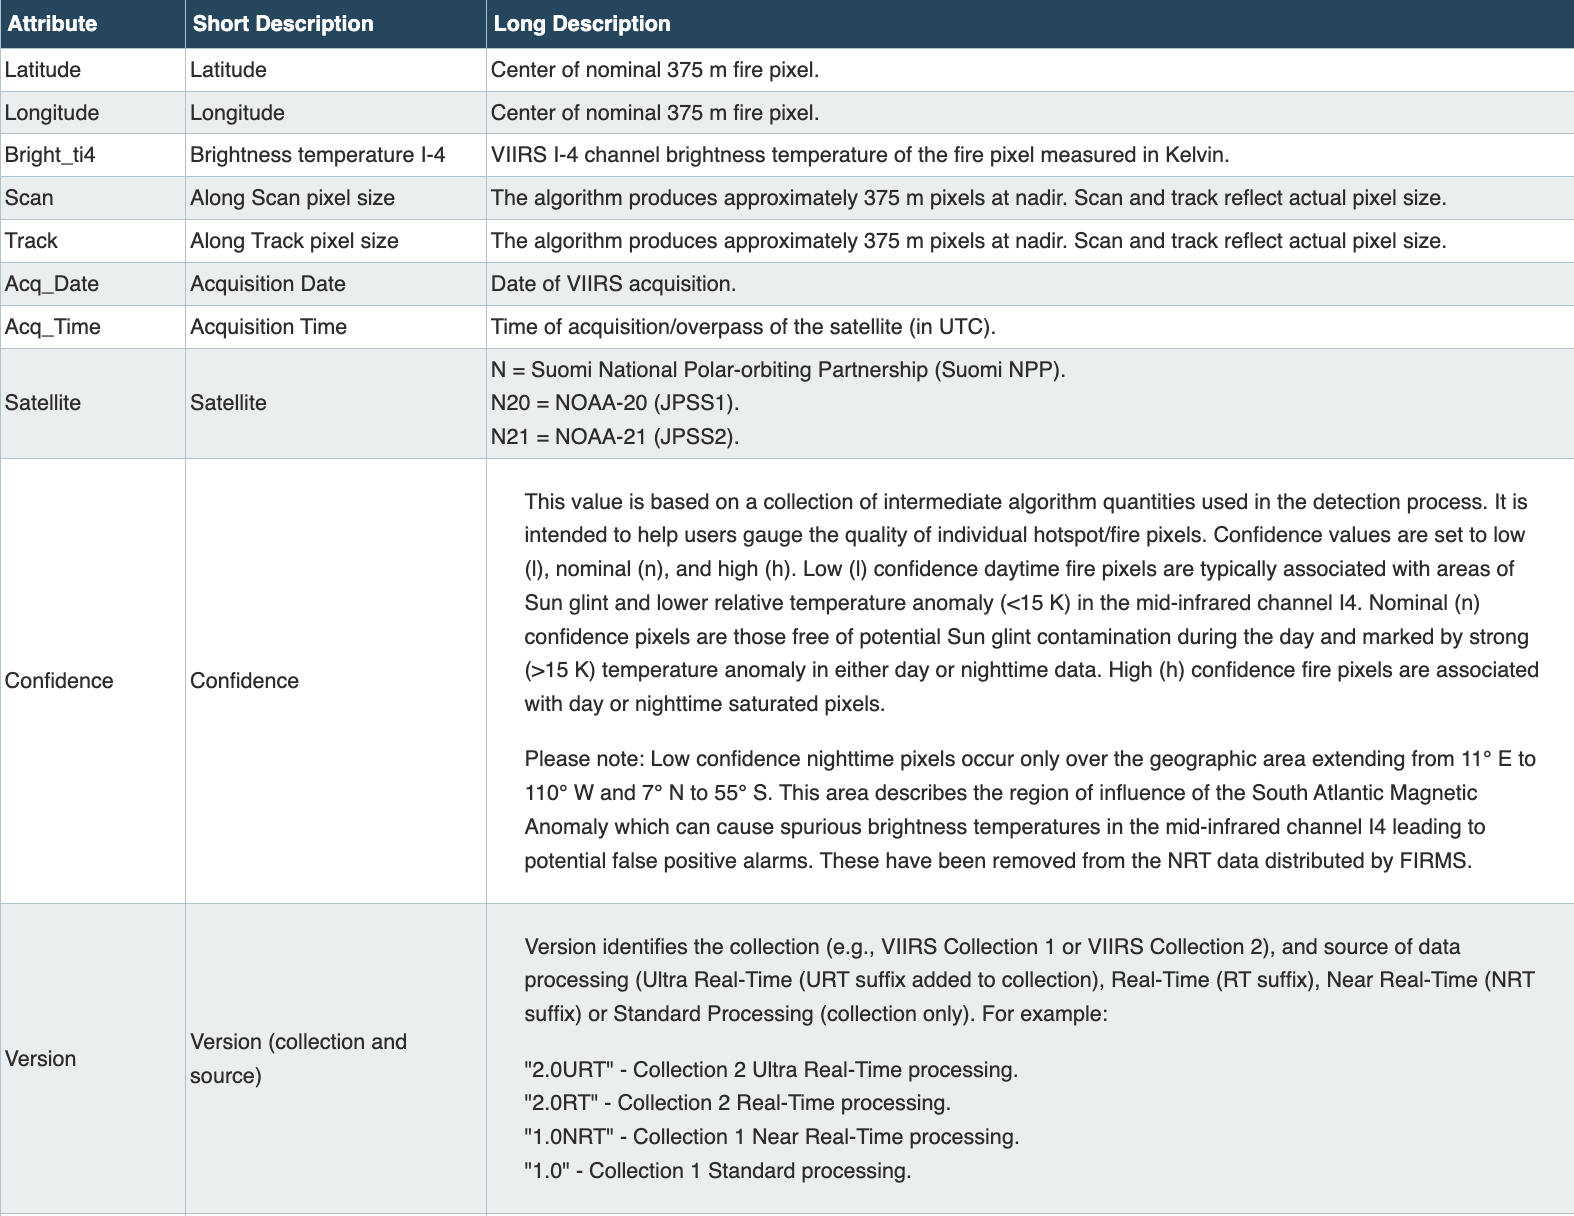
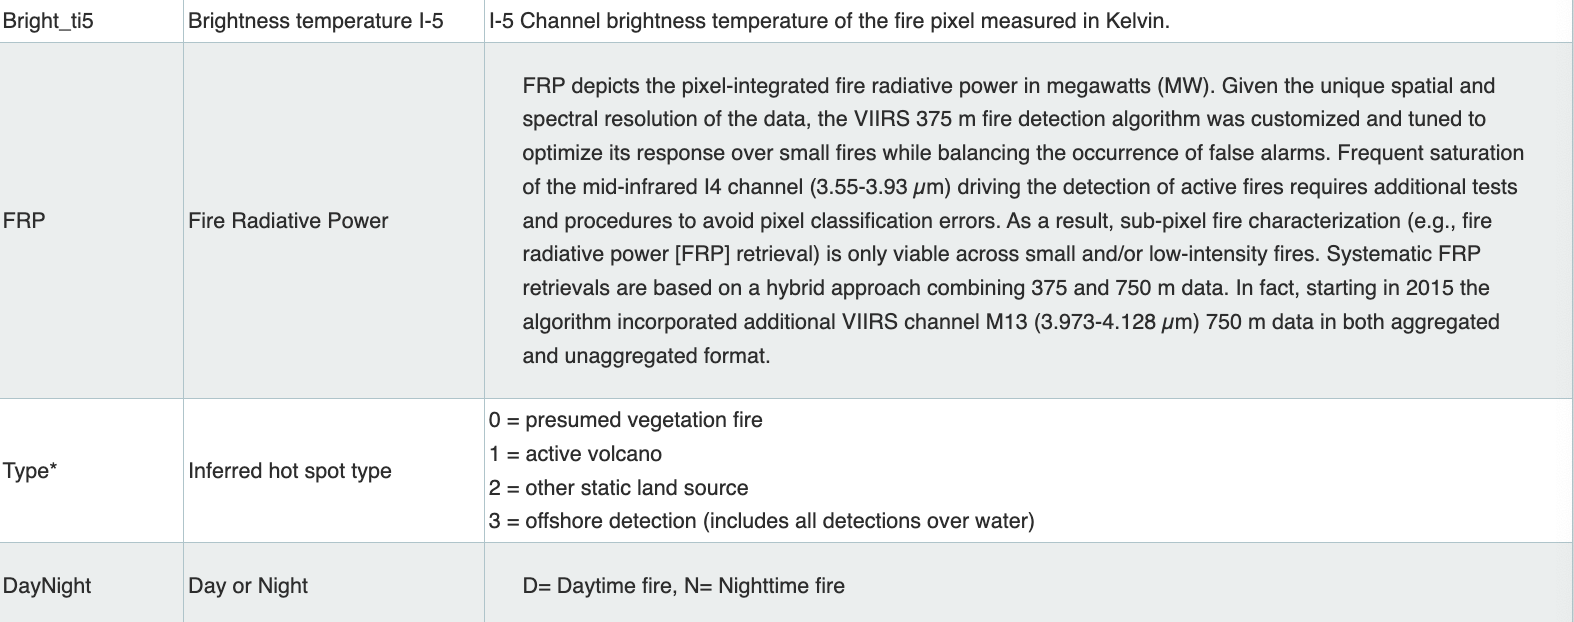

❗️ "Note: In general, the near real-time MODIS fire locations should not be used for time series analyses
or long-term studies; for such purposes the standard MCD14ML product is more appropriate. By
special request, FIRMS will distribute spatial subsets of MODIS fire locations extracted from the
standard MCD14ML product via the Archive Download Tool."

Beginner's guide to VIIRs imaging (see https://rammb.cira.colostate.edu/projects/npp/Beginner_Guide_to_VIIRS_Imagery_Data.pdf): 

 - Instrument scans a swath ~3040 km wide, this is the cross-track direction.
     - Each scan is ~12km in the along-track direction 
     - 48 scans comprise one 'granule'
     - one granule represnts ~85 seconds of data collected, which is ~570km in the along-track direction
     - hence, a granular covers about 3040km x 570km
     - data is distributed as individual granules
 - Relevant measurements:
     - 1. I-4 brightness temperature : temperature of the fire pixel in Kelvin (+273 to get Celsius eh!) measured by the I-4 sensor
       2. I-5 brightness : same as above except as measured by the I-5 sensor
       3. fire radiative power (FRP) : pixel-integrated fire radiative power in megawatts
- "Sub-pixel fire characterization is only viable across small and/or low-intensite fires" per the description of the FRP attributes|

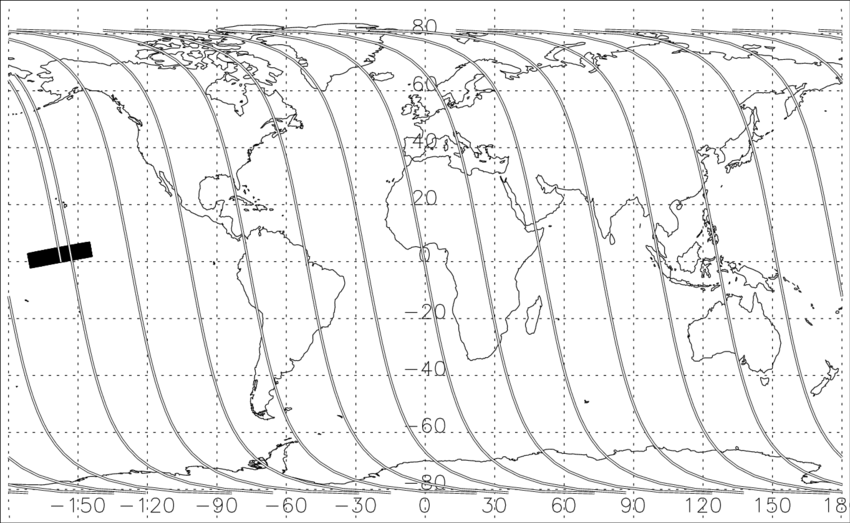

Source: Robinson, Wayne & Patt, Frederick & Franz, Bryan & Turpie, Kevin & Mcclain, Charles. (2009). A VIIRS ocean data simulator. Proc SPIE. 7452. 10.1117/12.827058. 

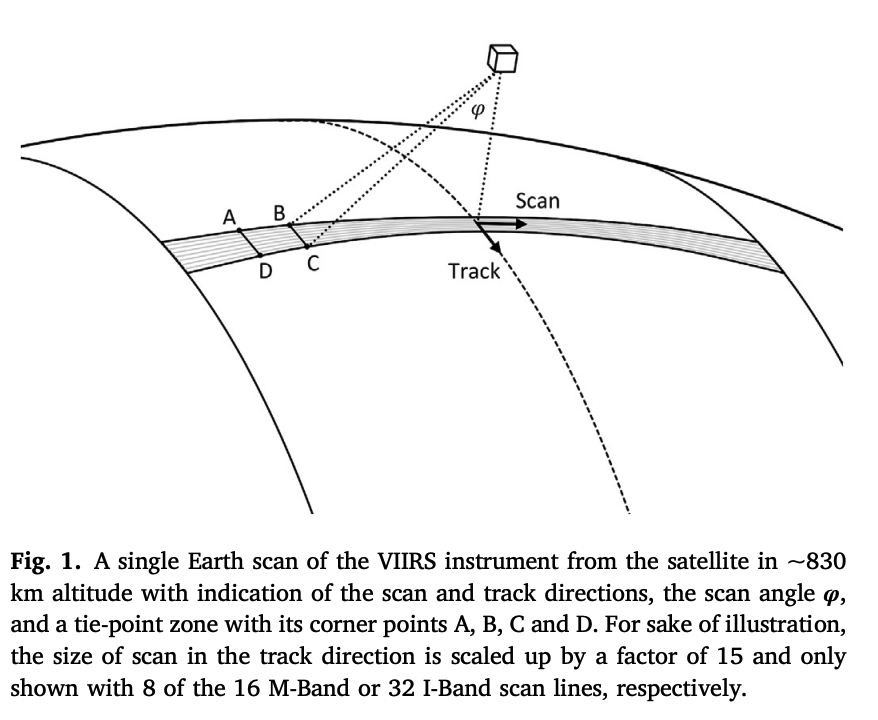

Source: Soerensen, Anders & Zinke, Stephan. (2020). A tie-point zone group compaction schema for the geolocation data of S-NPP and NOAA-20 VIIRS SDRs to reduce file sizes in memory-sensitive environments. Applied Computing and Geosciences. 6. 100025. 10.1016/j.acags.2020.100025. 

Per https://firms.modaps.eosdis.nasa.gov/download/Readme.txt, we should expect: 
- DL_FIRE_M-C61_xxxx if you requested MODIS data (C61 stands for MODIS Collection 6.1), or 
- DL_FIRE_J1V-C2_xxx if you requested VIIRS 375m data from  NOAA-20(JPSS-1)
- DL_FIRE_SV-C2_xxxx if you requested VIIRS 375m data from S-NPP
- DL_FIRE_LS_xxx if you requested LANDSAT 30m data

Where the xxx is the specific request number. 

In [11]:
!ls -l NASA-FIRMS

total 0
drwxr-xr-x   8 jason  staff  256 Sep 25 09:30 DL_FIRE_J1V-C2_519173
drwx------@  8 jason  staff  256 Sep 25 09:29 DL_FIRE_J2V-C2_519174
drwx------@ 13 jason  staff  416 Sep 25 09:29 DL_FIRE_M-C61_519172
drwx------@ 13 jason  staff  416 Sep 25 09:29 DL_FIRE_SV-C2_519175


In [12]:
!ls -lh NASA-FIRMS/DL_FIRE_J1V-C2_519173

total 493952
-rw-r--r--@ 1 jason  staff    89B Dec 16  2021 Readme.txt
-rw-r--r--@ 1 jason  staff     5B Sep 24 00:09 fire_nrt_J1V-C2_519173.cpg
-rw-r--r--@ 1 jason  staff   211M Sep 24 00:09 fire_nrt_J1V-C2_519173.dbf
-rw-r--r--@ 1 jason  staff   256B Sep 24 00:09 fire_nrt_J1V-C2_519173.prj
-rw-r--r--@ 1 jason  staff    23M Sep 24 00:09 fire_nrt_J1V-C2_519173.shp
-rw-r--r--@ 1 jason  staff   6.7M Sep 24 00:09 fire_nrt_J1V-C2_519173.shx


In [13]:
!ls -lh NASA-FIRMS/DL_FIRE_J2V-C2_519174/

total 115352
-rw-r--r--@ 1 jason  staff    89B Dec 16  2021 Readme.txt
-rw-r--r--@ 1 jason  staff     5B Sep 24 00:09 fire_nrt_J2V-C2_519174.cpg
-rw-r--r--@ 1 jason  staff    49M Sep 24 00:09 fire_nrt_J2V-C2_519174.dbf
-rw-r--r--@ 1 jason  staff   256B Sep 24 00:09 fire_nrt_J2V-C2_519174.prj
-rw-r--r--@ 1 jason  staff   5.5M Sep 24 00:09 fire_nrt_J2V-C2_519174.shp
-rw-r--r--@ 1 jason  staff   1.6M Sep 24 00:09 fire_nrt_J2V-C2_519174.shx


In [14]:
!ls -lh NASA-FIRMS/DL_FIRE_SV-C2_519175/ 

total 473624
-rw-r--r--@ 1 jason  staff    89B Dec 16  2021 Readme.txt
-rw-r--r--@ 1 jason  staff     5B Sep 24 00:10 fire_archive_SV-C2_519175.cpg
-rw-r--r--@ 1 jason  staff   163M Sep 24 00:10 fire_archive_SV-C2_519175.dbf
-rw-r--r--@ 1 jason  staff   256B Sep 24 00:10 fire_archive_SV-C2_519175.prj
-rw-r--r--@ 1 jason  staff    18M Sep 24 00:10 fire_archive_SV-C2_519175.shp
-rw-r--r--@ 1 jason  staff   5.1M Sep 24 00:10 fire_archive_SV-C2_519175.shx
-rw-r--r--@ 1 jason  staff     5B Sep 24 00:10 fire_nrt_SV-C2_519175.cpg
-rw-r--r--@ 1 jason  staff    40M Sep 24 00:10 fire_nrt_SV-C2_519175.dbf
-rw-r--r--@ 1 jason  staff   256B Sep 24 00:10 fire_nrt_SV-C2_519175.prj
-rw-r--r--@ 1 jason  staff   4.4M Sep 24 00:10 fire_nrt_SV-C2_519175.shp
-rw-r--r--@ 1 jason  staff   1.3M Sep 24 00:10 fire_nrt_SV-C2_519175.shx


In [15]:
!ls -lh NASA-FIRMS/DL_FIRE_M-C61_519172

total 128336
-rw-r--r--@ 1 jason  staff    89B Dec 16  2021 Readme.txt
-rw-r--r--@ 1 jason  staff     5B Sep 24 00:09 fire_archive_M-C61_519172.cpg
-rw-r--r--@ 1 jason  staff    47M Sep 24 00:09 fire_archive_M-C61_519172.dbf
-rw-r--r--@ 1 jason  staff   256B Sep 24 00:09 fire_archive_M-C61_519172.prj
-rw-r--r--@ 1 jason  staff   4.9M Sep 24 00:09 fire_archive_M-C61_519172.shp
-rw-r--r--@ 1 jason  staff   1.4M Sep 24 00:09 fire_archive_M-C61_519172.shx
-rw-r--r--@ 1 jason  staff     5B Sep 24 00:09 fire_nrt_M-C61_519172.cpg
-rw-r--r--@ 1 jason  staff   8.2M Sep 24 00:09 fire_nrt_M-C61_519172.dbf
-rw-r--r--@ 1 jason  staff   256B Sep 24 00:09 fire_nrt_M-C61_519172.prj
-rw-r--r--@ 1 jason  staff   909K Sep 24 00:09 fire_nrt_M-C61_519172.shp
-rw-r--r--@ 1 jason  staff   260K Sep 24 00:09 fire_nrt_M-C61_519172.shx


In [16]:
firms_data = [
    { 'source':'j1v',   'path':'NASA-FIRMS/DL_FIRE_J1V-C2_519173/fire_nrt_J1V-C2_519173.shp',   '' : [] }, 
    { 'source':'j2v',   'path':'NASA-FIRMS/DL_FIRE_J2V-C2_519174/fire_nrt_J2V-C2_519174.shp',   '' : [] },
    { 'source':'sv',    'path':'NASA-FIRMS/DL_FIRE_SV-C2_519175/fire_archive_SV-C2_519175.shp', '' : [] }, 
    { 'source':'modis', 'path':'NASA-FIRMS/DL_FIRE_M-C61_519172/fire_archive_M-C61_519172.shp', '' : [] },
]

In [17]:
import geopandas

In [18]:
firms_dfs = {}
for data in firms_data: 
    firms_dfs[data['source']] = geopandas.read_file(data['path']) 

In [19]:
for name, df in firms_dfs.items(): 
    print(name, ':', len(df), df.crs, df.geometry[0]) 

j1v : 875035 EPSG:4326 POINT (38.45541 53.30439)
j2v : 204292 EPSG:4326 POINT (35.15725 47.87732)
sv : 664824 EPSG:4326 POINT (42.18539 55.38543)
modis : 182469 EPSG:4326 POINT (29.9939 52.8464)


In [20]:
for name, df in firms_dfs.items(): 
    print(df.dtypes)

LATITUDE             float64
LONGITUDE            float64
BRIGHTNESS           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ms]
ACQ_TIME              object
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION               object
BRIGHT_T31           float64
FRP                  float64
DAYNIGHT              object
geometry            geometry
dtype: object
LATITUDE             float64
LONGITUDE            float64
BRIGHTNESS           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ms]
ACQ_TIME              object
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION               object
BRIGHT_T31           float64
FRP                  float64
DAYNIGHT              object
geometry            geometry
dtype: object
LATITUDE             float64
LONGITUDE            float64
BRIGHTNESS           float64
SCAN           

Hmm... SV and MODIS both carry a TYPE field. WHat is it? See the fields help here: https://www.earthdata.nasa.gov/data/tools/firms/active-fire-data-attributes-modis-viirs

Apparently this is inferred fire type, which is not available for the JxV sensors. 

```
0 = presumed vegetation fire
1 = active volcano
2 = other static land source
3 = offshore
```

Not sure this is that helpful, who knows what algorithm is being used to classify here. Hard to make use of it. 

In [21]:
firms_dfs['modis'].drop('TYPE', axis='columns', inplace=True) 
firms_dfs['sv'].drop('TYPE', axis='columns', inplace=True) 

In [22]:
firms_dfs['sv'].describe()

LATITUDE      LONGITUDE     BRIGHTNESS           SCAN  \
count  664824.000000  664824.000000  664824.000000  664824.000000   
mean       47.789094      35.313321     328.114252       0.458552   
min        39.600350      18.400080       0.000000       0.320000   
25%        44.912067      28.732870     309.780000       0.390000   
50%        47.517240      37.223785     331.700000       0.440000   
75%        51.056680      41.618093     340.880000       0.510000   
max        57.499810      49.099970     367.000000       0.800000   
std         4.249874       8.570333      19.035719       0.086624   

               TRACK                    ACQ_DATE     BRIGHT_T31            FRP  
count  664824.000000                      664824  664824.000000  664824.000000  
mean        0.479072  2022-05-05 06:11:39.570000     290.249905       7.093713  
min         0.360000         2020-09-01 00:00:00     238.290000       0.000000  
25%         0.380000         2021-07-10 00:00:00     283.220000       1.680000  
50%         0.440000         2022-04-02 00:00:00     289.950000       3.610000  
75%         0.560000         2023-04-20 00:00:00     297.690000       7.030000  
max         0.780000         2024-03-31 00:00:00     382.350000    3708.460000  
std         0.114644                         NaN      11.152174      16.623323

In [23]:
firms_dfs['sv'].head()

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME SATELLITE  \
0  55.38543   42.18539      299.74  0.61   0.71 2020-09-01     0102         N   
1  54.11068   41.78162      304.07  0.67   0.74 2020-09-01     0103         N   
2  54.10511   41.77459      302.14  0.67   0.74 2020-09-01     0103         N   
3  54.10914   41.78068      309.50  0.67   0.74 2020-09-01     0103         N   
4  54.10358   41.77362      295.06  0.67   0.74 2020-09-01     0103         N   

  INSTRUMENT CONFIDENCE VERSION  BRIGHT_T31   FRP DAYNIGHT  \
0      VIIRS          n       2      287.35  0.79        N   
1      VIIRS          n       2      285.18  1.54        N   
2      VIIRS          n       2      284.89  1.52        N   
3      VIIRS          n       2      285.47  0.89        N   
4      VIIRS          n       2      284.39  0.89        N   

                    geometry  
0  POINT (42.18539 55.38543)  
1  POINT (41.78162 54.11068)  
2  POINT (41.77459 54.10511)  
3  POINT (41.78068 54.10914)  
4  POINT (41.77362 54.10358)

The significance of the `VERSION` field, per the notebook FIRMS distributes, is available [here](https://wiki.earthdata.nasa.gov/pages/viewpage.action?pageId=258343755). However, it seems to be mostly a) processed by subtly different algorithms and b) timeliness of delivery. 

- URT = ultra-real-time, available within 1-minute of collect
- RT = near-real-time, available 20-30 minutes after collect
- NRT = real-time data, eventually replaces the RT/URT data

All are processed by the LANCE/FIRMS active fire algorithms. Here we only have NRT data because we did a historical pull, if we had grabbed something closer to the present date we would've presumablyt seen URT and RT versions in the download. 

In [24]:
for name, df in firms_dfs.items(): 
    print(name, df['VERSION'].unique()) 

j1v ['2.0NRT']
j2v ['2.0NRT']
sv ['2']
modis ['6.03' '61.03']


This field should be dropped. 

In [25]:
for name, df in firms_dfs.items(): 
    df.drop('VERSION', axis='columns', inplace=True) 

In [26]:
print(firms_dfs['j1v']['ACQ_TIME'].min())
print(firms_dfs['j1v']['ACQ_TIME'].max())

0000
2358


The SATELLITE field indicates, surprise, the spacecraft that the imager was riding on. 
- N20 (J1V), N21 (J2V), N (SV), Aqua (MODIS), Terra (MODIS)

Per FIRMS user guide (https://www.earthdata.nasa.gov/data/tools/firms/faq) the points provided are the center of the FIRMS pixel where the theremal event was detected. 

>Scan and Track values are included in the attributes (see: What are the attributes / fields of the active fire data?). The scan value represents the spatial-resolution in the East-West direction of the scan and the track value represents the North-South spatial resolution of the scan. It should be noted that the pixel size is not always 1 km across the scan track. The pixels at the “Eastern” and the “Western” edges of the scan are bigger than 1 km. It is 1 km only along the nadir (exact vertical from the satellite). Thus, the values shown for scan and track represent the actual spatial resolution of the scanned pixel.

More is provided on the FAQ, but not quite enough for me to make sense of how to convert the scan/track values to a polygon: 

> The 375 m data describe the nominal resolution after native data are spatially aggregated (see figure below).

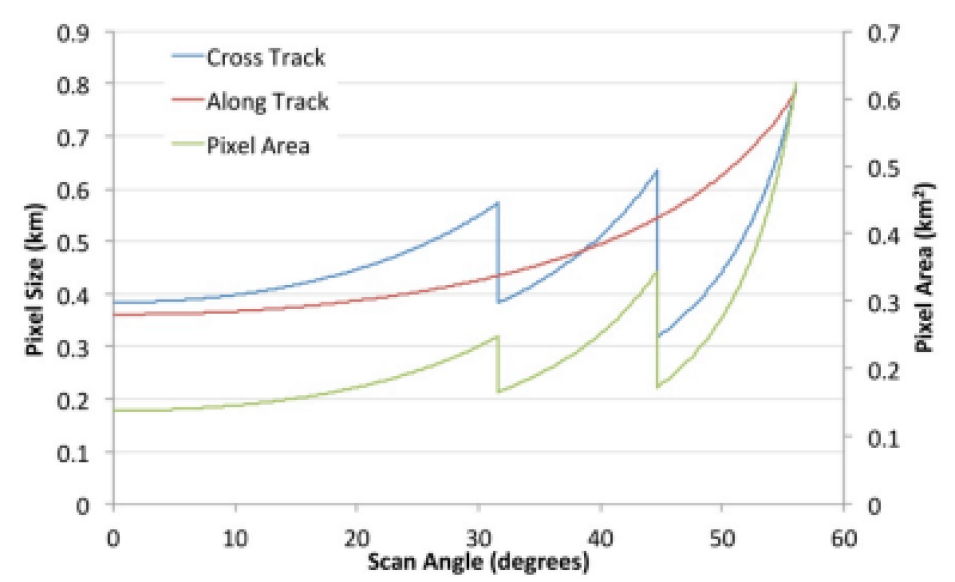
>Spatial resolution of VIIRS imagery data as a function of scan angle. The three distinct regions represent unique data aggregation zones extending from nadir to the edge of swath.

>The aggregation scheme changes across three distinct image regions. In the first region (nadir to 31.59° scan angle), three native pixels are aggregated in the along scan (cross-track) direction to form one data sample in the Level 1 image. In the second region (31.59° to 44.68° scan angle), two native pixels are aggregated to form one data sample. Finally in the third and last region (44.68° to 56.06° - edge of swath) one native pixel will result in one data sample. All five 375 m channels are aggregated onboard the spacecraft before the data are transmitted to the ground stations, whereas a subset of the VIIRS 750 m data (dual-gain channels only) are aggregated on the ground.

❗️D'oh! The pixels are in kilometers. I wasn't sweating, ha. Not at all. The challenge here is that we don't really know what the orbit of the spacecraft is, other than the cartoon above and the polar orbit. I think we have to simplify for this analysis and presume scan is east/west and track is north/south. Add this to the datasheet. 

On the temporal frequency of overflight: 
> The VIIRS instrument aboard the Suomi NPP and NOAA-20/21 satellites acquire data continuously. The 3,040 km VIIRS swath enables ≈15% image overlap between consecutive orbits at the equator, thereby providing full global coverage every 12 hours. Suomi NPP has a nominal (equator-crossing) observation times at 1:30 p.m. and 1:30 a.m., Mean Local Time (MLT); NOAA-21 is flying half an orbit, or 50 minutes, ahead of NOAA-20, with Suomi NPP between them. The mid-latitudes  experience 3-4 looks a day as these are polar-orbiting satellite.

Re MODIS: 
❗️ what is the modis overflight frequency? 

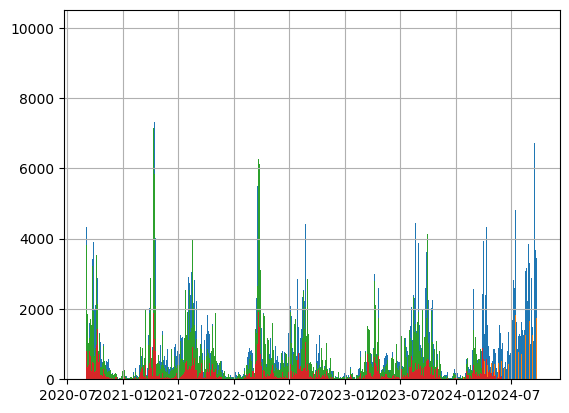

In [27]:
for name, df in firms_dfs.items(): 
    df['ACQ_DATE'].hist(bins=1000)

Reasonably number of detections across the whole requested window. Spikes must be seasonal or based on rain/drought?

Confidence levels are (h)igh, (n)ormal, (l)ow. Though purportedly MODIS collect can source these as a 0-100 metric. 

In [28]:
for name, df in firms_dfs.items(): 
    print(name, df['CONFIDENCE'].unique()) 

j1v ['n' 'h' 'l']
j2v ['n' 'l' 'h']
sv ['n' 'l' 'h']
modis [ 84  69  66  68  73  79  56  81  37  85  74  71  83  60  86  80  57  65
 100  40  72  45  63  87  70  44  82  77  90  35  25  46  88  54  61  43
  31  47  92  89  67  96  52  99  95  38  55  41  50  27  51  59   0  62
  75  93  76  94  98  42  39  26  97  48  78  34  91  12  33  17  64  58
  29  49  28  30  16  24  13  36  53  22  19  32  18  20  23  21   4  14
  15  10   7   9  11   3   6   5   8   1   2]


In [29]:
firms_dfs['modis'].head() 

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME SATELLITE  \
0   52.8464    29.9939       312.2   1.2    1.1 2020-09-01     0036      Aqua   
1   52.8035    27.8381       306.7   1.0    1.0 2020-09-01     0036      Aqua   
2   43.9113    25.4285       305.9   1.2    1.1 2020-09-01     0038      Aqua   
3   44.0821    25.6330       306.0   1.2    1.1 2020-09-01     0038      Aqua   
4   54.7363    47.9106       316.2   1.2    1.1 2020-09-01     0821     Terra   

  INSTRUMENT  CONFIDENCE  BRIGHT_T31   FRP DAYNIGHT                 geometry  
0      MODIS          84       286.7  16.5        N  POINT (29.9939 52.8464)  
1      MODIS          69       284.3  10.6        N  POINT (27.8381 52.8035)  
2      MODIS          66       290.9  10.2        N  POINT (25.4285 43.9113)  
3      MODIS          66       289.4  10.3        N   POINT (25.633 44.0821)  
4      MODIS          68       301.1  10.4        D  POINT (47.9106 54.7363)

In [30]:
def convert_modis_confidence(c): 
    s = 'l'
    if c > 66: 
        s = 'h' 
    elif c > 33:
        s = 'n' 

    return s
    
firms_dfs['modis']['CONFIDENCE'] = firms_dfs['modis']['CONFIDENCE'].apply(convert_modis_confidence)  

❗️Todo: note our confusion here and decision to use equal interfaces for confidence (by virtue of above function), also see https://www.earthdata.nasa.gov/sites/default/files/imported/MODIS_C6_Fire_User_Guide_B.pdf

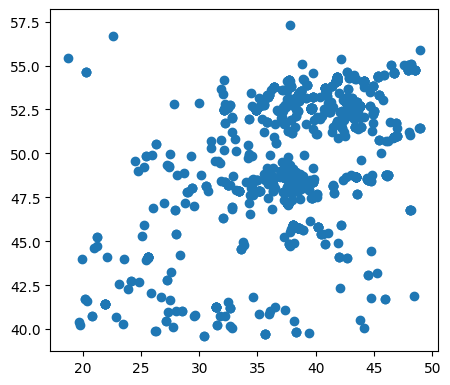

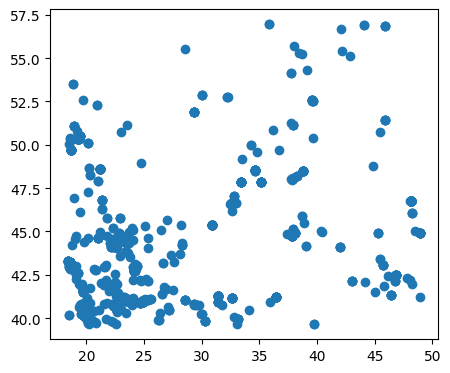

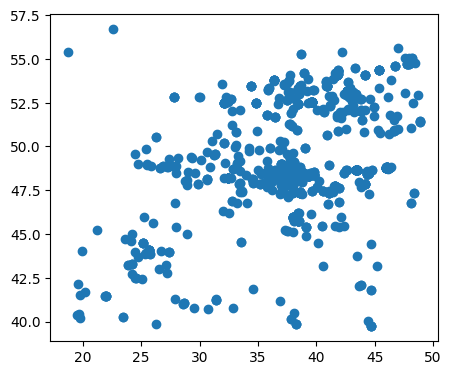

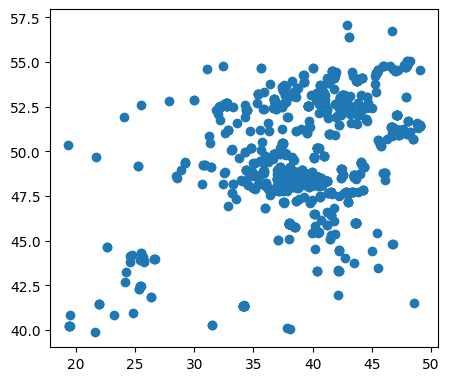

In [31]:
for name, df in firms_dfs.items(): 
    df[0:1000].plot(figsize=(5,5))

In [32]:
for name, df in firms_dfs.items(): 
    print(df.count()) 

LATITUDE      875035
LONGITUDE     875035
BRIGHTNESS    875035
SCAN          875035
TRACK         875035
ACQ_DATE      875035
ACQ_TIME      875035
SATELLITE     875035
INSTRUMENT    875035
CONFIDENCE    875035
BRIGHT_T31    875035
FRP           875035
DAYNIGHT      875035
geometry      875035
dtype: int64
LATITUDE      204292
LONGITUDE     204292
BRIGHTNESS    204292
SCAN          204292
TRACK         204292
ACQ_DATE      204292
ACQ_TIME      204292
SATELLITE     204292
INSTRUMENT    204292
CONFIDENCE    204292
BRIGHT_T31    204292
FRP           204292
DAYNIGHT      204292
geometry      204292
dtype: int64
LATITUDE      664824
LONGITUDE     664824
BRIGHTNESS    664824
SCAN          664824
TRACK         664824
ACQ_DATE      664824
ACQ_TIME      664824
SATELLITE     664824
INSTRUMENT    664824
CONFIDENCE    664824
BRIGHT_T31    664824
FRP           664824
DAYNIGHT      664824
geometry      664824
dtype: int64
LATITUDE      182469
LONGITUDE     182469
BRIGHTNESS    182469
SCAN          18

Mercifully, no null values to contend with. Join into one DF to simplify future operations. 

In [33]:
firms_df = geopandas.GeoDataFrame()

In [34]:
def get_memory_usage(df): 
    return f"{df.memory_usage(index=True).sum()//1024:,} KB"

In [35]:
for name, df in firms_dfs.items(): 
    print(f"{name}: {get_memory_usage(df)}")
    firms_df = pd.concat([firms_df, df]) 
    print(f"-> aggregate DF: {get_memory_usage(firms_df)}")

j1v: 95,707 KB
-> aggregate DF: 95,707 KB
j2v: 22,344 KB
-> aggregate DF: 126,483 KB
sv: 72,715 KB
-> aggregate DF: 204,392 KB
modis: 19,957 KB
-> aggregate DF: 225,775 KB


In [36]:
sum = 0 
for name, df in firms_dfs.items(): 
    sum += len(df)
    print(sum) 

875035
1079327
1744151
1926620


In [37]:
firms_df.count()

LATITUDE      1926620
LONGITUDE     1926620
BRIGHTNESS    1926620
SCAN          1926620
TRACK         1926620
ACQ_DATE      1926620
ACQ_TIME      1926620
SATELLITE     1926620
INSTRUMENT    1926620
CONFIDENCE    1926620
BRIGHT_T31    1926620
FRP           1926620
DAYNIGHT      1926620
geometry      1926620
dtype: int64

In [38]:
firms_df = firms_df.sample(frac=sample_percent) 

In [39]:
firms_df.count()

LATITUDE      57799
LONGITUDE     57799
BRIGHTNESS    57799
SCAN          57799
TRACK         57799
ACQ_DATE      57799
ACQ_TIME      57799
SATELLITE     57799
INSTRUMENT    57799
CONFIDENCE    57799
BRIGHT_T31    57799
FRP           57799
DAYNIGHT      57799
geometry      57799
dtype: int64

In [40]:
firms_df.head(1) 

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME  \
99190  49.12006   34.71819       338.9  0.51   0.49 2021-03-29     0942   

      SATELLITE INSTRUMENT CONFIDENCE  BRIGHT_T31  FRP DAYNIGHT  \
99190       N20      VIIRS          n       288.4  4.5        D   

                        geometry  
99190  POINT (34.71819 49.12006)

The acquisition date and time aren't super helpful here for filtering or making temporal comparisons. Reinterpret these as datetimes. Per the data types guide, these are already in GMT. See https://www.earthdata.nasa.gov/data/tools/firms/active-fire-data-attributes-modis-viirs 

Conversion syntax borrowed from FIRMS sample notebook here: https://firms.modaps.eosdis.nasa.gov/content/academy/data_ingest/firms_data_ingest.html

In [41]:
def build_acq_date(d, t): 
    return pd.to_datetime(str(d.date()) + ' ' + t.zfill(4), format='%Y-%m-%d %H%M')

In [42]:
firms_df['ACQ_DATETIME'] = firms_df.apply(lambda x: build_acq_date(x['ACQ_DATE'], x['ACQ_TIME']), axis='columns')

Constrain the detections to Ukraine... 

<Axes: >

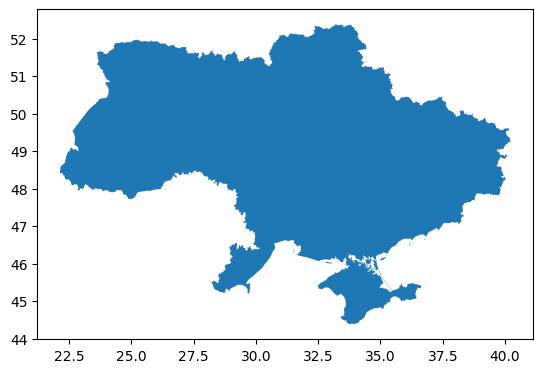

In [43]:
ukr_admin_l0.plot()

In [44]:
type(ukr_admin_l0) 

geopandas.geodataframe.GeoDataFrame

In [45]:
type(firms_df) 

geopandas.geodataframe.GeoDataFrame

In [46]:
firms_df.count()

LATITUDE        57799
LONGITUDE       57799
BRIGHTNESS      57799
SCAN            57799
TRACK           57799
ACQ_DATE        57799
ACQ_TIME        57799
SATELLITE       57799
INSTRUMENT      57799
CONFIDENCE      57799
BRIGHT_T31      57799
FRP             57799
DAYNIGHT        57799
geometry        57799
ACQ_DATETIME    57799
dtype: int64

In [47]:
firms_ukraine_df = firms_df.sjoin(ukr_admin_l0, how="inner")

In [48]:
firms_ukraine_df.count()

LATITUDE        16492
LONGITUDE       16492
BRIGHTNESS      16492
SCAN            16492
TRACK           16492
ACQ_DATE        16492
ACQ_TIME        16492
SATELLITE       16492
INSTRUMENT      16492
CONFIDENCE      16492
BRIGHT_T31      16492
FRP             16492
DAYNIGHT        16492
geometry        16492
ACQ_DATETIME    16492
index_right     16492
ADM0_EN         16492
ADM0_UA         16492
ADM0_RU         16492
ADM0_PCODE      16492
date            16492
validOn         16492
validTo             0
AREA_SQKM       16492
Shape_Length    16492
Shape_Area      16492
dtype: int64

<Axes: >

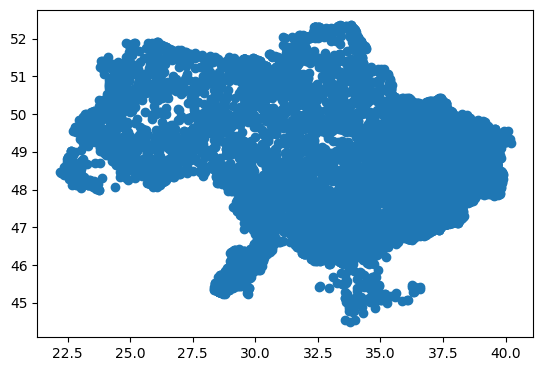

In [49]:
firms_ukraine_df.plot()

In [50]:
firms_ukraine_df.head()

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME  \
99190   49.12006   34.71819      338.90  0.51   0.49 2021-03-29     0942   
179651  50.54336   26.25998      313.03  0.44   0.62 2021-07-28     2318   
61404   49.93162   37.69037      330.06  0.58   0.52 2024-06-01     1058   
554960  48.46292   38.77892      340.47  0.56   0.52 2023-08-19     0925   
434720  48.05919   37.95206      307.15  0.40   0.60 2022-09-14     2235   

       SATELLITE INSTRUMENT CONFIDENCE  ...  ADM0_EN  ADM0_UA  ADM0_RU  \
99190        N20      VIIRS          n  ...  Ukraine  Україна  Украина   
179651         N      VIIRS          n  ...  Ukraine  Україна  Украина   
61404        N21      VIIRS          n  ...  Ukraine  Україна  Украина   
554960         N      VIIRS          n  ...  Ukraine  Україна  Украина   
434720         N      VIIRS          n  ...  Ukraine  Україна  Украина   

       ADM0_PCODE                      date                   validOn validTo  \
99190          UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   
179651         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   
61404          UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   
554960         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   
434720         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   

            AREA_SQKM Shape_Length Shape_Area  
99190   600217.274417   112.065036  73.804151  
179651  600217.274417   112.065036  73.804151  
61404   600217.274417   112.065036  73.804151  
554960  600217.274417   112.065036  73.804151  
434720  600217.274417   112.065036  73.804151  

[5 rows x 26 columns]

The metadata from the admin layer is unneeded. 

In [51]:
print(get_memory_usage(firms_ukraine_df))

3,478 KB


In [52]:
firms_ukraine_df.drop(
    [
        'index_right', 
        'ADM0_EN', 
        'ADM0_UA', 
        'ADM0_RU', 
        'ADM0_PCODE', 
        'date', 
        'validOn', 
        'validTo', 
        'AREA_SQKM', 
        'Shape_Length', 
        'Shape_Area' 
    ], 
    axis='columns', 
    inplace=True
) 

In [53]:
firms_ukraine_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
print(get_memory_usage(firms_ukraine_df))

2,061 KB


## ACLED Ukraine Dataset

- ACLED dashboard: https://developer.acleddata.com/dashboard/main/
- ACLED knowledge base, notably helpful in understanding the schema and definitions of fields: https://acleddata.com/knowledge-base/codebook/
- API, https://api.acleddata.com/acled/read/?key=****************1234&email=you@youremail.coms
    - Note this supports GET and POST (why the latter?) to 

In [55]:
!ls ACLED

2020-09-01-2024-09-24-Ukraine.csv
2022-01-01-2024-10-30-Russia-Ukraine.csv


In [56]:
ukraine_maxi_path = 'ACLED/2020-09-01-2024-09-24-Ukraine.csv'

In [57]:
import pandas as pd

In [58]:
acled = pd.read_csv(ukraine_maxi_path) 

In [59]:
acled.describe()

year  time_precision       iso       latitude      longitude  \
count  144700.000000   144700.000000  144700.0  144700.000000  144700.000000   
mean     2022.826206        1.010546     804.0      48.650598      36.148745   
std         0.929916        0.116560       0.0       1.418788       2.286673   
min      2020.000000        1.000000     804.0      43.389000      22.205600   
25%      2022.000000        1.000000     804.0      47.703500      34.755100   
50%      2023.000000        1.000000     804.0      48.331900      37.229700   
75%      2024.000000        1.000000     804.0      49.520400      37.837700   
max      2024.000000        3.000000     804.0      52.341300      40.132200   

       geo_precision     fatalities     timestamp  
count  144700.000000  144700.000000  1.447000e+05  
mean        1.641596       0.813338  1.696671e+09  
std         0.526992       7.492743  2.663896e+07  
min         1.000000       0.000000  1.618436e+09  
25%         1.000000       0.000000  1.680026e+09  
50%         2.000000       0.000000  1.699988e+09  
75%         2.000000       0.000000  1.720552e+09  
max         3.000000     600.000000  1.732047e+09

In [60]:
acled.head(2)

event_id_cnty         event_date  year  time_precision       disorder_type  \
0     UKR185192  24 September 2024  2024               1  Political violence   
1     UKR185193  24 September 2024  2024               1  Political violence   

                   event_type    sub_event_type  \
0                     Battles       Armed clash   
1  Explosions/Remote violence  Air/drone strike   

                                        actor1 assoc_actor_1  \
0            Military Forces of Russia (2000-)           NaN   
1  Military Forces of Russia (2000-) Air Force           NaN   

                  inter1  ...   location latitude longitude geo_precision  \
0  External/Other forces  ...  Andriivka  49.2420   37.8105             2   
1  External/Other forces  ...  Andriivka  48.5008   37.9680             1   

                           source  source_scale  \
0  Ministry of Defence of Ukraine         Other   
1  Ministry of Defence of Ukraine         Other   

                                               notes fatalities tags  \
0  On 24 September 2024, Russian forces clashed w...          0  NaN   
1  On 24 September 2024, Russian forces launched ...          0  NaN   

    timestamp  
0  1727819876  
1  1727819876  

[2 rows x 31 columns]

In [61]:
len(acled)

144700

In [62]:
acled['year'].unique() 

array([2024, 2023, 2022, 2021, 2020])

Convert the string date to a datetime to enable distance calculations, etc. 

In [63]:
acled['event_date'] = pd.to_datetime(acled['event_date'], format='%d %B %Y') 

In [64]:
acled_ukraine = acled[acled['country'] ==  'Ukraine']

In [65]:
acled_ukraine = acled_ukraine.sample(frac=sample_percent)

In [66]:
len(acled_ukraine)

4341

In [67]:
acled_ukraine.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')

In [68]:
acled_ukraine.drop(
    [
        'year', 
        'actor1', 
        'assoc_actor_1', 
        'inter1',
        'actor2', 
        'assoc_actor_2', 
        'inter2',
        'interaction', 
        'civilian_targeting', 
        'iso', 
        'region',
        'country',
        'source',
        'source_scale',
        'notes',
        'fatalities',
        'tags', 
        'timestamp',
    ], 
    axis='columns', 
    inplace=True
) 

Note the ACLED reporting protocol for event times, both precision and the practice of adding an event per day where events span multiple days: https://acleddata.com/knowledge-base/codebook/#event-time
 - Per documentation, code 1 = day, code 2 = week, code 3 = ~month

❗️Related, but not covered in the above, is the problem of aligning the reporting times with the NASA observations. Does ACLED use GMT? Perhaps local time? No confirmation anywhere, we're going to have to make an assumption. 

Drop events with time precision that's looser than a single day.

In [69]:
acled_ukraine.drop(acled_ukraine[acled_ukraine.time_precision > 1].index, inplace=True)

Because we're looking exclusively for events that might motivate a thermal anomaly, remove non-kinetic reporting from the ACLED ukraine data

In [70]:
acled_group1 = acled_ukraine.groupby(by='disorder_type')

In [71]:
acled_group1.count()

event_id_cnty  event_date  time_precision  \
disorder_type                                                                   
Demonstrations                                 75          75              75   
Political violence                           3967        3967            3967   
Political violence; Demonstrations              1           1               1   
Strategic developments                        252         252             252   

                                    event_type  sub_event_type  admin1  \
disorder_type                                                            
Demonstrations                              75              75      75   
Political violence                        3967            3967    3967   
Political violence; Demonstrations           1               1       1   
Strategic developments                     252             252     252   

                                    admin2  admin3  location  latitude  \
disorder_type                                                            
Demonstrations                          75      54        75        75   
Political violence                    3962    3956      3967      3967   
Political violence; Demonstrations       1       1         1         1   
Strategic developments                 248     243       252       252   

                                    longitude  geo_precision  
disorder_type                                                 
Demonstrations                             75             75  
Political violence                       3967           3967  
Political violence; Demonstrations          1              1  
Strategic developments                    252            252

In [72]:
acled_group2 = acled_ukraine.groupby(by='event_type')

In [73]:
acled_group2.count()

event_id_cnty  event_date  time_precision  \
event_type                                                              
Battles                               903         903             903   
Explosions/Remote violence           3050        3050            3050   
Protests                               76          76              76   
Riots                                   2           2               2   
Strategic developments                252         252             252   
Violence against civilians             12          12              12   

                            disorder_type  sub_event_type  admin1  admin2  \
event_type                                                                  
Battles                               903             903     903     902   
Explosions/Remote violence           3050            3050    3050    3046   
Protests                               76              76      76      76   
Riots                                   2               2       2       2   
Strategic developments                252             252     252     248   
Violence against civilians             12              12      12      12   

                            admin3  location  latitude  longitude  \
event_type                                                          
Battles                        901       903       903        903   
Explosions/Remote violence    3043      3050      3050       3050   
Protests                        55        76        76         76   
Riots                            0         2         2          2   
Strategic developments         243       252       252        252   
Violence against civilians      12        12        12         12   

                            geo_precision  
event_type                                 
Battles                               903  
Explosions/Remote violence           3050  
Protests                               76  
Riots                                   2  
Strategic developments                252  
Violence against civilians             12

In [74]:
acled_group3 = acled_ukraine.groupby(by='sub_event_type')
acled_group3.count()

event_id_cnty  event_date  \
sub_event_type                                                   
Abduction/forced disappearance                   5           5   
Agreement                                        1           1   
Air/drone strike                               585         585   
Armed clash                                    885         885   
Attack                                           6           6   
Change to group/activity                         3           3   
Disrupted weapons use                          227         227   
Excessive force against protesters               1           1   
Government regains territory                     7           7   
Grenade                                          1           1   
Looting/property destruction                     5           5   
Mob violence                                     2           2   
Non-state actor overtakes territory             11          11   
Non-violent transfer of territory                1           1   
Other                                           15          15   
Peaceful protest                                74          74   
Protest with intervention                        1           1   
Remote explosive/landmine/IED                   47          47   
Sexual violence                                  1           1   
Shelling/artillery/missile attack             2417        2417   

                                     time_precision  disorder_type  \
sub_event_type                                                       
Abduction/forced disappearance                    5              5   
Agreement                                         1              1   
Air/drone strike                                585            585   
Armed clash                                     885            885   
Attack                                            6              6   
Change to group/activity                          3              3   
Disrupted weapons use                           227            227   
Excessive force against protesters                1              1   
Government regains territory                      7              7   
Grenade                                           1              1   
Looting/property destruction                      5              5   
Mob violence                                      2              2   
Non-state actor overtakes territory              11             11   
Non-violent transfer of territory                 1              1   
Other                                            15             15   
Peaceful protest                                 74             74   
Protest with intervention                         1              1   
Remote explosive/landmine/IED                    47             47   
Sexual violence                                   1              1   
Shelling/artillery/missile attack              2417           2417   

                                     event_type  admin1  admin2  admin3  \
sub_event_type                                                            
Abduction/forced disappearance                5       5       5       5   
Agreement                                     1       1       1       0   
Air/drone strike                            585     585     582     581   
Armed clash                                 885     885     884     883   
Attack                                        6       6       6       6   
Change to group/activity                      3       3       3       3   
Disrupted weapons use                       227     227     223     219   
Excessive force against protesters            1       1       1       1   
Government regains territory                  7       7       7       7   
Grenade                                       1       1       1       1   
Looting/property destruction                  5       5       5       5   
Mob violence                                  2       2       2     

In [75]:
acled_ukraine['sub_event_type'].unique()

array(['Armed clash', 'Air/drone strike',
       'Shelling/artillery/missile attack',
       'Abduction/forced disappearance', 'Disrupted weapons use',
       'Peaceful protest', 'Government regains territory',
       'Looting/property destruction', 'Remote explosive/landmine/IED',
       'Non-state actor overtakes territory', 'Other', 'Attack',
       'Mob violence', 'Agreement', 'Excessive force against protesters',
       'Protest with intervention', 'Change to group/activity',
       'Non-violent transfer of territory', 'Grenade', 'Sexual violence'],
      dtype=object)

In [76]:
acled_ukraine[acled_ukraine['disorder_type'] == 'Strategic developments'].groupby(by='sub_event_type').count()

event_id_cnty  event_date  time_precision  \
sub_event_type                                                                 
Agreement                                      1           1               1   
Change to group/activity                       3           3               3   
Disrupted weapons use                        227         227             227   
Looting/property destruction                   5           5               5   
Non-violent transfer of territory              1           1               1   
Other                                         15          15              15   

                                   disorder_type  event_type  admin1  admin2  \
sub_event_type                                                                 
Agreement                                      1           1       1       1   
Change to group/activity                       3           3       3       3   
Disrupted weapons use                        227         227     227     223   
Looting/property destruction                   5           5       5       5   
Non-violent transfer of territory              1           1       1       1   
Other                                         15          15      15      15   

                                   admin3  location  latitude  longitude  \
sub_event_type                                                             
Agreement                               0         1         1          1   
Change to group/activity                3         3         3          3   
Disrupted weapons use                 219       227       227        227   
Looting/property destruction            5         5         5          5   
Non-violent transfer of territory       1         1         1          1   
Other                                  15        15        15         15   

                                   geo_precision  
sub_event_type                                    
Agreement                                      1  
Change to group/activity                       3  
Disrupted weapons use                        227  
Looting/property destruction                   5  
Non-violent transfer of territory              1  
Other                                         15

In [77]:
drop_subevents = [
    'Abduction/forced disappearance', 
    'Agreement', 
    #'Armed clash', 
    #'Air/drone strike',
    #'Shelling/artillery/missile attack', 
    #'Disrupted weapons use',
    #'Remote explosive/landmine/IED', 
    'Peaceful protest', 
    'Other',
    #'Non-state actor overtakes territory', 
    'Change to group/activity',
    #'Attack', 
    #'Grenade', 
    'Abduction/forced disappearance',
    #'Headquarters or base established', 
    #'Looting/property destruction',
    #'Arrests', 
    'Government regains territory', 
    #'Sexual violence',
    #'Protest with intervention', 
    'Suicide bomb',
    #'Non-violent transfer of territory', 
    #'Agreement', 
    #'Mob violence',
    'Excessive force against protesters', 
    'Violent demonstration'
]

In [78]:
for subevent in drop_subevents: 
    acled_ukraine.drop(acled_ukraine[acled_ukraine.sub_event_type == subevent].index, inplace=True)

In [79]:
get_memory_usage(acled_ukraine) 

'458 KB'

In [80]:
acled_ukraine_gdf = geopandas.GeoDataFrame(
    acled_ukraine, 
    geometry = geopandas.points_from_xy(acled_ukraine.longitude, acled_ukraine.latitude),
    crs = "EPSG:4326"
) 

In [81]:
get_memory_usage(acled_ukraine_gdf) 

'490 KB'

according to https://acleddata.com/knowledge-base/codebook/#event-geography there are precision codes for the locations furnished, and some locations may not include points... 

In [82]:
import seaborn as sns

<Figure size 640x480 with 0 Axes>

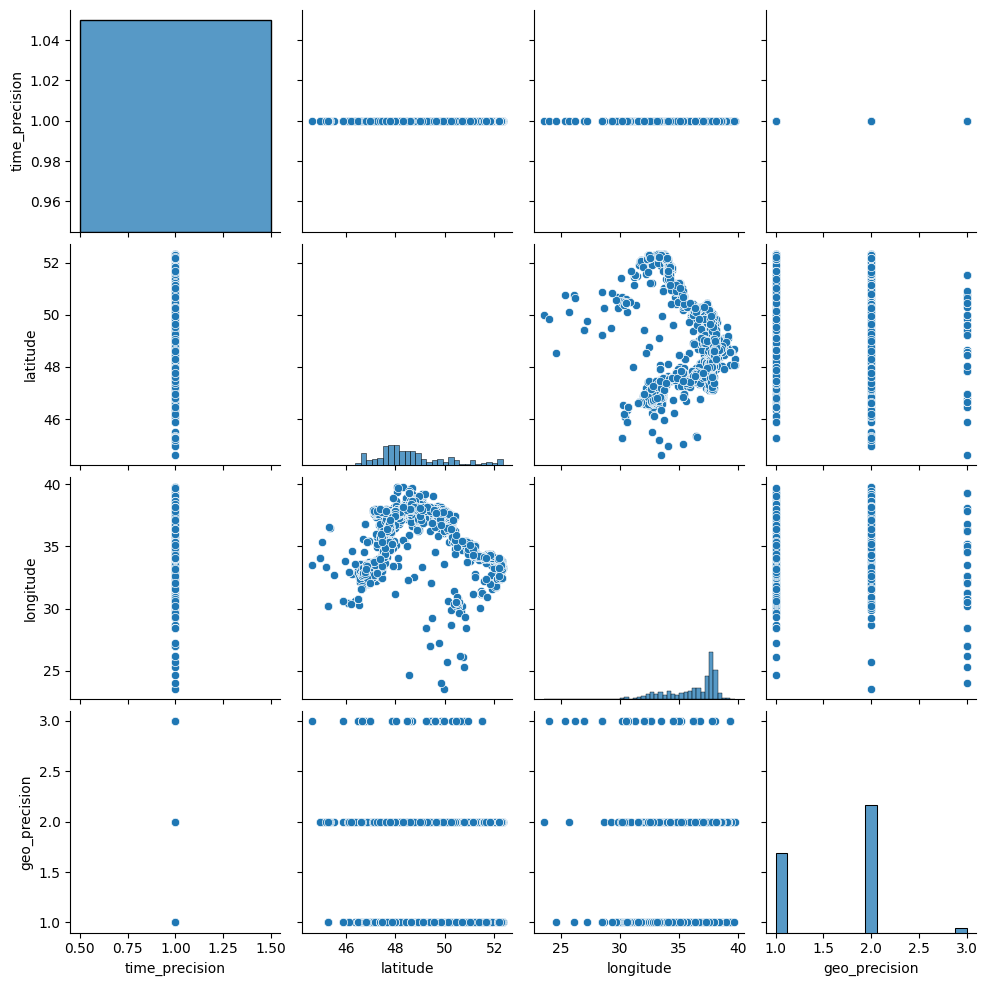

In [83]:
plt.figure() 
sns.pairplot(acled_ukraine_gdf) 
plt.show()

<Axes: >

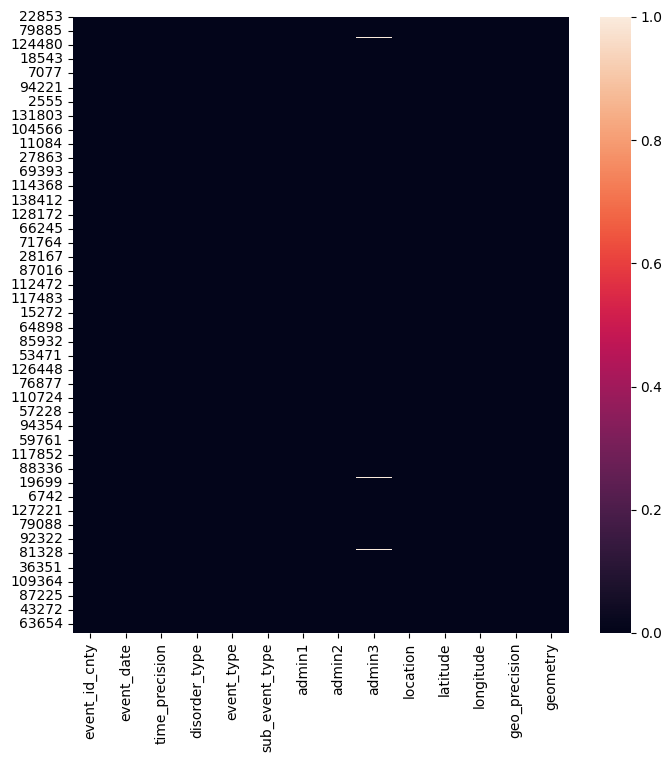

In [84]:
plt.figure(figsize=(8,8))
sns.heatmap(acled_ukraine_gdf.isnull()) 

In [85]:
null = acled_ukraine_gdf.isnull().sum(axis=0)

In [86]:
null

event_id_cnty      0
event_date         0
time_precision     0
disorder_type      0
event_type         0
sub_event_type     0
admin1             0
admin2             9
admin3            19
location           0
latitude           0
longitude          0
geo_precision      0
geometry           0
dtype: int64

In [87]:
props = 'admin1', 'admin2', 'admin3', 'location'
for prop in props: 
    print(f"{prop} null count: {null[prop]} ({null[prop]/len(acled_ukraine_gdf) * 100}%)") 

admin1 null count: 0 (0.0%)
admin2 null count: 9 (0.21484841250895204%)
admin3 null count: 19 (0.453568870852232%)
location null count: 0 (0.0%)


Remove columns with limited location information 

In [88]:
acled_ukraine_gdf.dropna(subset=['admin2', 'admin3'], inplace=True)

In [89]:
len(acled_ukraine_gdf)

4170

❗️add correlation matrices for the relevant types? 
`df.corr(method='pearson', numeric_only=True)`

### ACLED Geography

In [90]:
acled.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')

In [91]:
acled['iso'].unique()

array([804])

In [92]:
# https://www.iso.org/obp/ui/#search/code/
# license: Creative Commons Attribution for Intergovernmental Organisations
iso_codes = { 
    'Russian Federation' : 643, 
    'Ukraine' : 804
}   

In [93]:
geography = acled[['iso', 'region', 'country', 'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude', 'geo_precision']]

In [94]:
geography.tail(10) 

iso  region  country     admin1         admin2              admin3  \
144690  804  Europe  Ukraine    Donetsk      Donetskyi            Donetska   
144691  804  Europe  Ukraine    Luhansk  Shchastynskyi  Stanychno-Luhanska   
144692  804  Europe  Ukraine  Kyiv City           Kyiv                 NaN   
144693  804  Europe  Ukraine      Odesa        Odeskyi              Odeska   
144694  804  Europe  Ukraine    Donetsk   Mariupolskyi           Sartanska   
144695  804  Europe  Ukraine    Donetsk     Pokrovskyi            Marinska   
144696  804  Europe  Ukraine    Donetsk     Horlivskyi           Horlivska   
144697  804  Europe  Ukraine  Kyiv City           Kyiv                 NaN   
144698  804  Europe  Ukraine  Kyiv City           Kyiv                 NaN   
144699  804  Europe  Ukraine  Kyiv City           Kyiv                 NaN   

                       location  latitude  longitude  geo_precision  
144690  Donetsk - Voroshilovsky   48.0177    37.8063              2  
144691       Stanytsia Luhanska   48.6543    39.4794              2  
144692   Kyiv - Shevchenkivskyi   50.4646    30.4655              1  
144693                    Odesa   46.4639    30.7386              1  
144694                  Vodyane   47.1478    37.7881              2  
144695                  Marinka   47.9425    37.5050              2  
144696                  Maiorsk   48.4005    37.9708              2  
144697        Kyiv - Pecherskyi   50.4270    30.5454              1  
144698        Kyiv - Pecherskyi   50.4270    30.5454              1  
144699        Kyiv - Pecherskyi   50.4270    30.5454              1

In [95]:
acled.head(1) 

event_id_cnty event_date  year  time_precision       disorder_type  \
0     UKR185192 2024-09-24  2024               1  Political violence   

  event_type sub_event_type                             actor1 assoc_actor_1  \
0    Battles    Armed clash  Military Forces of Russia (2000-)           NaN   

                  inter1  ...   location latitude longitude geo_precision  \
0  External/Other forces  ...  Andriivka   49.242   37.8105             2   

                           source  source_scale  \
0  Ministry of Defence of Ukraine         Other   

                                               notes fatalities tags  \
0  On 24 September 2024, Russian forces clashed w...          0  NaN   

    timestamp  
0  1727819876  

[1 rows x 31 columns]

In [96]:
ukr_admin_l2.head()

ADM2_EN          ADM2_UA         ADM2_RU ADM2_PCODE  \
0  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский     UA0102   
1       Bilohirskyi     Білогірський     Белогорский     UA0104   
2      Dzhankoiskyi     Джанкойський     Джанкойский     UA0106   
3    Yevpatoriiskyi   Євпаторійський   Евпаторийский     UA0108   
4       Kerchenskyi      Керченський      Керченский     UA0110   

                         ADM1_EN                    ADM1_UA  \
0  Autonomous Republic of Crimea  Автономна Республіка Крим   
1  Autonomous Republic of Crimea  Автономна Республіка Крим   
2  Autonomous Republic of Crimea  Автономна Республіка Крим   
3  Autonomous Republic of Crimea  Автономна Республіка Крим   
4  Autonomous Republic of Crimea  Автономна Республіка Крим   

                      ADM1_RU ADM1_PCODE  ADM0_EN  ADM0_UA  ADM0_RU  \
0  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
1  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
2  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
3  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
4  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   

  ADM0_PCODE                      date                   validOn validTo  \
0         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   
1         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   
2         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   
3         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   
4         UA 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT   

     AREA_SQKM  Shape_Length  Shape_Area  \
0  2381.307249      3.859768    0.270186   
1  2929.480534      5.565672    0.335566   
2  2173.954032      8.921192    0.251445   
3  3870.102122      4.813707    0.444439   
4  3025.634007      5.979506    0.346806   

                                            geometry  
0  MULTIPOLYGON (((34.28075 44.76307, 34.27738 44...  
1  MULTIPOLYGON (((35.0613 45.57474, 35.061 45.57...  
2  MULTIPOLYGON (((34.69742 45.71048, 34.69734 45...  
3  MULTIPOLYGON (((33.09983 45.71323, 33.10027 45...  
4  MULTIPOLYGON (((35.45832 45.27045, 35.45806 45...

In [97]:
def compare_sets(s1, s2, print_limit=20): 
    """
    Compare two series for similarity and emit some associated information 
    """
    print(f"Set 1 has {len(s1)} members, set 2 has {len(s2)} members") 
    diff = s1 ^ s2
    common = s1 & s2
    print(f"There are {len(diff)} differences between the two ({len(common)} in common).") 

    if s1.issuperset(s2): 
        print(f"Set 1 is a superset of set 2!") 

    elif s2.issuperset(s1): 
        print(f"Set 2 is a superset of set 1!") 
    
    else: 
        s1_diff = s1.difference(s2)
        print(f"\nSet 1 has these items ({len(s1_diff)}) that are not in set 2:") 
        for i, member in enumerate(s1_diff): 
            if i > print_limit: 
                print(f" Limit reached") 
                break 
            print(f"{member}") 
        
        s2_diff = s2.difference(s1)
        print(f"\nSet 2 has these items ({len(s2_diff)}) that are not in set 1:") 
        for i, member in enumerate(s2_diff):
            if i > print_limit: 
                print(f" Limit reached") 
                break 
            print(f"{member}") 

In [98]:
compare_sets(set(ukr_admin_l4['ADM1_EN'].unique()), set(acled_ukraine_gdf['admin1'].unique()), 5) 

Set 1 has 27 members, set 2 has 23 members
There are 48 differences between the two (1 in common).

Set 1 has these items (26) that are not in set 2:
Chernivetska
Donetska
Volynska
Sumska
Cherkaska
Odeska
 Limit reached

Set 2 has these items (22) that are not in set 1:
Vinnytsia
Ternopil
Rivne
Kharkiv
Sumy
Luhansk
 Limit reached


In [99]:
compare_sets(set(ukr_admin_l4['ADM2_EN'].unique()), set(acled_ukraine_gdf['admin2'].unique()), 5) 

Set 1 has 139 members, set 2 has 77 members
There are 64 differences between the two (76 in common).

Set 1 has these items (63) that are not in set 2:
Voznesenskyi
Novoukrainskyi
Kosivskyi
Dzhankoiskyi
Uzhhorodskyi
Mohyliv-Podilskyi
 Limit reached

Set 2 has these items (1) that are not in set 1:
Chuguivskyi


In [100]:
compare_sets(set(ukr_admin_l4['ADM3_EN'].unique()), set(acled_ukraine_gdf['admin3'].unique()), 5) 

Set 1 has 1553 members, set 2 has 290 members
There are 1319 differences between the two (262 in common).

Set 1 has these items (1291) that are not in set 2:
Veselivska
Boromlianska
Korostyshivska
Buhrynska
Hukivska
Ladyzhynska
 Limit reached

Set 2 has these items (28) that are not in set 1:
Bilozepska
Chepnigivska
Vilhuvatska
Rivne
Kalinovskaya
Tpostyanetska
 Limit reached


In [101]:
compare_sets(set(ukr_admin_l4['ADM4_EN'].unique()), set(acled_ukraine_gdf['location'].unique()), 5) 

Set 1 has 17541 members, set 2 has 1032 members
There are 16821 differences between the two (876 in common).

Set 1 has these items (16665) that are not in set 2:
Zhuky
Klekotiv
Syrnytsia
Maidanetske
Chaikovske
Kurazhyn
 Limit reached

Set 2 has these items (156) that are not in set 1:
Zolote-4
Dariivka
Zalizna Balka
Donetsk - Leninskyi
Verkhnyoshyrokivske
Mykhaylivske
 Limit reached


I can't find the shapefiles/spatial data for adminstrative boundaries that ACLED used, only the humanitarian data exchange geodatabase. The differences that need to be reconciled before a spatial join can happen: 
 - Admin 1 has little overlap due to transliteration, but chat GPT and brute force can resolve this easily
 - Admin 2 has 130 common names, only 3 are in ACLED but not in refernce, also easy to resolve with a manual inspection
 - Admin 3 has 658 in common, with 60 ACLED places that aren't in the reference data... manually patchable also.
 - Admin 4/location has ... well 447 to reconcile anyway

As much overlap as there is here, there is enough to create some confusion and there's a non-trivial amount of work to align these two. We'll treat the humanitarian data exchange adminstrative boundaries and placenames as authoritative, since we have no traceaability or referneces for the ACLED place transliterations and I'm not qualified to reconcile the differences here.  

❗️ Read this to clarify ACLED Ukraine reporting strategy: https://acleddata.com/knowledge-base/acled-methodology-and-coding-decisions-around-conflict-in-ukraine/

# Processing

The goal of this dataset aggregation and curation effort is to assemble a dataset of possible correlations battlefield activity the thermal anomalies that activity may be responsible for. The datasets are intersected as follows: 
1. temporal filtering
    - data is removed that falls outside the window of event reporting OR the window of thermal anomalies
2. event filtering
    - events that are not potential sources of thermal anomalies are removed
    - events with inadequate geospatial resolution are removed, as the uncertainty surrounding the origin of the event leaves to broad an are to be considered for an associated thermal anomaly
3. geospatial filtering
    - events that fall outside of the internationally recognized Ukrainian borders
4. cleaning
    - all named administrative boundaries have been normalized to the humanitarian data exchange english transliteration, original transliteration is left for future validation or error correction as needed
4. enrichment
    - thermal events that are possible correlated to battlefield events temporally and spatially are indicated. the means for correlation is indicated in the respective column. 
4. annotations
    - provenance for all correlations is maintained

❗️ we need to consider carefully what time precision AND geo precision to remove here
- large locational uncertainty seems like it should invalidate a record (what conclusions can we draw about a spatial correlation between a thermal anomaly in on very small part of a province at the same time an airstrike happens somewhere in the same province? ... for example
- anything with less than day precision probably needs to be removed

## Temporal Alignment

Trim any rows that are beyond the overlapping dates in these datasets... 

In [102]:
start = max(firms_ukraine_df['ACQ_DATE'].min(), acled_ukraine_gdf['event_date'].min())
start

Timestamp('2020-09-05 00:00:00')

In [103]:
firms_ukraine_df.drop(firms_ukraine_df[firms_ukraine_df.ACQ_DATE < start].index, inplace=True)
acled_ukraine_gdf.drop(acled_ukraine_gdf[acled_ukraine_gdf.event_date < start].index, inplace=True)

In [104]:
end = min(firms_ukraine_df['ACQ_DATE'].max(), acled_ukraine_gdf['event_date'].max()) 
end

Timestamp('2024-09-24 00:00:00')

In [105]:
firms_ukraine_df.drop(firms_ukraine_df[firms_ukraine_df.ACQ_DATE > end].index, inplace=True)
acled_ukraine_gdf.drop(acled_ukraine_gdf[acled_ukraine_gdf.event_date > end].index, inplace=True)

In [106]:
len(firms_ukraine_df)

16391

In [107]:
len(acled_ukraine_gdf) 

4170

In [108]:
firms_ukraine_df.head() 

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME  \
99190   49.12006   34.71819      338.90  0.51   0.49 2021-03-29     0942   
179651  50.54336   26.25998      313.03  0.44   0.62 2021-07-28     2318   
61404   49.93162   37.69037      330.06  0.58   0.52 2024-06-01     1058   
554960  48.46292   38.77892      340.47  0.56   0.52 2023-08-19     0925   
434720  48.05919   37.95206      307.15  0.40   0.60 2022-09-14     2235   

       SATELLITE INSTRUMENT CONFIDENCE  BRIGHT_T31   FRP DAYNIGHT  \
99190        N20      VIIRS          n      288.40  4.50        D   
179651         N      VIIRS          n      280.49  1.84        N   
61404        N21      VIIRS          n      299.46  9.14        D   
554960         N      VIIRS          n      303.27  9.13        D   
434720         N      VIIRS          n      282.30  1.08        N   

                         geometry        ACQ_DATETIME  
99190   POINT (34.71819 49.12006) 2021-03-29 09:42:00  
179651  POINT (26.25998 50.54336) 2021-07-28 23:18:00  
61404   POINT (37.69037 49.93162) 2024-06-01 10:58:00  
554960  POINT (38.77892 48.46292) 2023-08-19 09:25:00  
434720  POINT (37.95206 48.05919) 2022-09-14 22:35:00

In [109]:
acled_ukraine_gdf.head(5) 

event_id_cnty event_date  time_precision       disorder_type  \
22853      UKR156796 2024-04-18               1  Political violence   
12748      UKR165263 2024-07-03               1  Political violence   
60342      UKR127556 2023-08-09               1  Political violence   
116470      UKR65490 2022-07-26               1  Political violence   
11974      UKR166049 2024-07-09               1  Political violence   

                        event_type                     sub_event_type  \
22853                      Battles                        Armed clash   
12748                      Battles                        Armed clash   
60342   Explosions/Remote violence                   Air/drone strike   
116470  Explosions/Remote violence  Shelling/artillery/missile attack   
11974   Explosions/Remote violence                   Air/drone strike   

         admin1       admin2               admin3          location  latitude  \
22853   Donetsk  Volnovaskyi          Vuhledarska           Vodyane   47.8265   
12748   Donetsk   Pokrovskyi        Novohrodivska          Kalynove   48.1393   
60342   Donetsk  Volnovaskyi  Velykonovosilkivska  Velyka Novosilka   47.8453   
116470  Donetsk   Pokrovskyi         Ocheretynska   Novobakhmutivka   48.2489   
11974   Donetsk   Pokrovskyi         Myrnohradska         Myrnohrad   48.2959   

        longitude  geo_precision                 geometry  
22853     37.3127              2  POINT (37.3127 47.8265)  
12748     37.4412              2  POINT (37.4412 48.1393)  
60342     36.8353              2  POINT (36.8353 47.8453)  
116470    37.7875              1  POINT (37.7875 48.2489)  
11974     37.2704              2  POINT (37.2704 48.2959)

❗️ Temporal alignment... does ACLED use zulu/UTC? if not, what and how do we align for the purposes of our attempt at intersecting the datasets?

## Spatial Join

❗️Need to join acled points with the enclosing administrative boundaries, for example: 

In [110]:
example_id = acled_ukraine_gdf.iloc[2].event_id_cnty

In [111]:
example_event = acled_ukraine_gdf[acled_ukraine_gdf['event_id_cnty']==example_id]

In [112]:
example_event

event_id_cnty event_date  time_precision       disorder_type  \
60342     UKR127556 2023-08-09               1  Political violence   

                       event_type    sub_event_type   admin1       admin2  \
60342  Explosions/Remote violence  Air/drone strike  Donetsk  Volnovaskyi   

                    admin3          location  latitude  longitude  \
60342  Velykonovosilkivska  Velyka Novosilka   47.8453    36.8353   

       geo_precision                 geometry  
60342              2  POINT (36.8353 47.8453)

In [113]:
example_event.iloc[0].location in ukr_admin_l4.ADM4_EN.unique()

True

In [114]:
a = ukr_admin_l4.ADM3_EN == example_event.iloc[0].admin3

In [115]:
b = ukr_admin_l4.ADM4_EN == example_event.iloc[0].location

In [116]:
example_gdf = ukr_admin_l4[a & b]

In [117]:
example_gdf

ADM4_EN           ADM4_UA            ADM4_RU    ADM4_PCODE  \
5251  Velyka Novosilka  Велика Новосілка  Великая Новоселка  UA1404001001   

                  ADM3_EN               ADM3_UA               ADM3_RU  \
5251  Velykonovosilkivska  Великоновосілківська  Великоновоселковская   

     ADM3_PCODE      ADM2_EN       ADM2_UA  ...  ADM0_UA  ADM0_RU ADM0_PCODE  \
5251  UA1404001  Volnovaskyi  Волноваський  ...  Україна  Украина         UA   

                          date                   validOn validTo AREA_SQKM  \
5251 2024-03-18 00:00:00+00:00 2024-04-16 00:00:00+00:00     NaT  8.656678   

     Shape_Length Shape_Area  \
5251     0.167554    0.00104   

                                               geometry  
5251  MULTIPOLYGON (((36.82689 47.82569, 36.82716 47...  

[1 rows x 27 columns]

<Axes: >

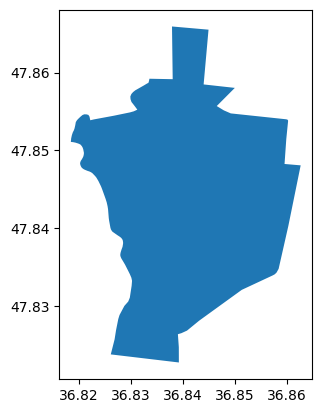

In [118]:
example_gdf.plot()

We would need to do a quadruple match on the adm1,2,3 and location fields -- against the HDX dataset, but as pointed out earlier, the transliterations are not consistent between the two, and even being a character off in any of these would invalidate the correlation. Instead, treat the HDX as authoritative, discard the ACLED placenames, and do a spatial join on the ACLED lat/long (which is clearly stated to be the coordinate of the placename reported on, though not necessarily exactly where the event happened). 

### Mapping events to administrative boundaries

In [119]:
event_l4_gdf = ukr_admin_l4.sjoin(example_event, how="inner")
event_l3_gdf = ukr_admin_l3.sjoin(example_event, how="inner")
event_l2_gdf = ukr_admin_l2.sjoin(example_event, how="inner")

<Axes: >

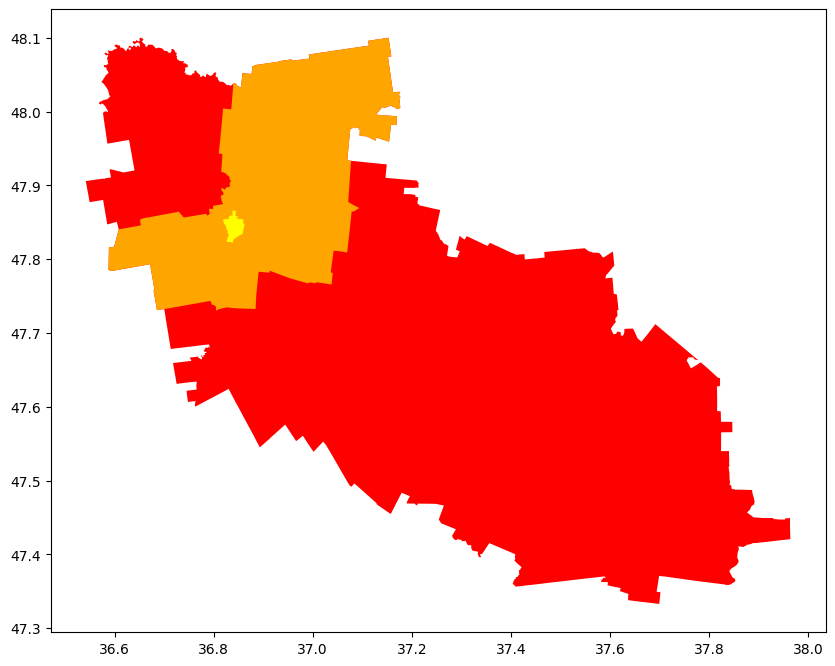

In [120]:
fig, ax = plt.subplots(figsize=(10,10))
event_l2_gdf.plot(ax=ax, color='red')
event_l3_gdf.plot(ax=ax, color='orange')
event_l4_gdf.plot(ax=ax, color='yellow')

In [121]:
event_l4_gdf.head()

ADM4_EN           ADM4_UA            ADM4_RU    ADM4_PCODE  \
5251  Velyka Novosilka  Велика Новосілка  Великая Новоселка  UA1404001001   

                  ADM3_EN               ADM3_UA               ADM3_RU  \
5251  Velykonovosilkivska  Великоновосілківська  Великоновоселковская   

     ADM3_PCODE      ADM2_EN       ADM2_UA  ...       disorder_type  \
5251  UA1404001  Volnovaskyi  Волноваський  ...  Political violence   

                      event_type    sub_event_type   admin1       admin2  \
5251  Explosions/Remote violence  Air/drone strike  Donetsk  Volnovaskyi   

                   admin3          location latitude longitude geo_precision  
5251  Velykonovosilkivska  Velyka Novosilka  47.8453   36.8353             2  

[1 rows x 41 columns]

We are retaining 41 columns after the join, many of which are not relevant to our intended use... drop all l4 columns we don't need. 

In [122]:
event_l4_gdf.columns

Index(['ADM4_EN', 'ADM4_UA', 'ADM4_RU', 'ADM4_PCODE', 'ADM3_EN', 'ADM3_UA',
       'ADM3_RU', 'ADM3_PCODE', 'ADM2_EN', 'ADM2_UA', 'ADM2_RU', 'ADM2_PCODE',
       'ADM1_EN', 'ADM1_UA', 'ADM1_RU', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_UA',
       'ADM0_RU', 'ADM0_PCODE', 'date', 'validOn', 'validTo', 'AREA_SQKM',
       'Shape_Length', 'Shape_Area', 'geometry', 'index_right',
       'event_id_cnty', 'event_date', 'time_precision', 'disorder_type',
       'event_type', 'sub_event_type', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision'],
      dtype='object')

In [123]:
ukr_admin_l4.columns

Index(['ADM4_EN', 'ADM4_UA', 'ADM4_RU', 'ADM4_PCODE', 'ADM3_EN', 'ADM3_UA',
       'ADM3_RU', 'ADM3_PCODE', 'ADM2_EN', 'ADM2_UA', 'ADM2_RU', 'ADM2_PCODE',
       'ADM1_EN', 'ADM1_UA', 'ADM1_RU', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_UA',
       'ADM0_RU', 'ADM0_PCODE', 'date', 'validOn', 'validTo', 'AREA_SQKM',
       'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')

Prune the administrative division reference dataframe as well as the event dataframe to just the essential columns for the join and subsequent analysis. 

In [124]:
# Keep only the transliterated placenames
ukr_admin_l4.drop([ 
        #'ADM4_EN', 
        #'ADM4_UA', 
        'ADM4_RU', 
        'ADM4_PCODE', 
        #'ADM3_EN', 
        #'ADM3_UA',
        'ADM3_RU', 
        'ADM3_PCODE', 
        #'ADM2_EN', 
        #'ADM2_UA', 
        'ADM2_RU', 
        'ADM2_PCODE',
        #'ADM1_EN', 
        #'ADM1_UA', 
        'ADM1_RU', 
        'ADM1_PCODE', 
        'ADM0_EN', 
        'ADM0_UA',
        'ADM0_RU', 
        'ADM0_PCODE', 
        'date', 
        'validOn', 
        'validTo', 
        'AREA_SQKM',
        'Shape_Length', 
        'Shape_Area', 
    ], 
    axis='columns', 
    inplace=True)

In [125]:
ukr_admin_l3.columns

Index(['ADM3_EN', 'ADM3_UA', 'ADM3_RU', 'ADM3_PCODE', 'ADM2_EN', 'ADM2_UA',
       'ADM2_RU', 'ADM2_PCODE', 'ADM1_EN', 'ADM1_UA', 'ADM1_RU', 'ADM1_PCODE',
       'ADM0_EN', 'ADM0_UA', 'ADM0_RU', 'ADM0_PCODE', 'date', 'validOn',
       'validTo', 'AREA_SQKM', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')

> Locations are recorded to named populated places, geostrategic locations, natural locations, or neighborhoods of larger cities. Geo-coordinates with four decimals are provided to assist in identifying and mapping named locations to a central point (i.e. a centroid coordinate) within that location. Geo-coordinates do not reflect a more precise location, like a block or street corner, within the named location.

In [126]:
# Keep only the transliterated placenames for L3 boundaries
ukr_admin_l3.drop([ 
        #'ADM3_EN', 
        #'ADM3_UA',
        'ADM3_RU', 
        'ADM3_PCODE', 
        #'ADM2_EN', 
        #'ADM2_UA', 
        'ADM2_RU', 
        'ADM2_PCODE',
        #'ADM1_EN', 
        #'ADM1_UA', 
        'ADM1_RU', 
        'ADM1_PCODE', 
        'ADM0_EN', 
        'ADM0_UA',
        'ADM0_RU', 
        'ADM0_PCODE', 
        'date', 
        'validOn', 
        'validTo', 
        'AREA_SQKM',
        'Shape_Length', 
        'Shape_Area', 
    ], 
    axis='columns', 
    inplace=True)

In [127]:
acled_ukraine_gdf.columns

Index(['event_id_cnty', 'event_date', 'time_precision', 'disorder_type',
       'event_type', 'sub_event_type', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'geometry'],
      dtype='object')

In [128]:
acled_ukraine_gdf.drop([
        #'event_id_cnty',  
        #'event_date', 
        'time_precision', 
        #'disorder_type',
        #'event_type', 
        #'sub_event_type', 
        'admin1', 
        'admin2', 
        'admin3',
        #'location', 
        #'latitude', 
        #'longitude', 
        #'geo_precision', 
        #'geometry'
    ], 
    axis='columns',
    inplace=True
)

Execute a spatial join on eventing data, ensuring each point in that dataset maps to geometric shape in the reference data. 

In [129]:
get_memory_usage(acled_ukraine_gdf) 

'358 KB'

In [130]:
events_gdf = acled_ukraine_gdf.sjoin(ukr_admin_l4, how="left")

In [131]:
events_gdf.tail(10)

event_id_cnty event_date       disorder_type  \
47607      UKR134464 2023-11-02  Political violence   
19021      UKR178136 2024-05-16  Political violence   
55994      UKR127202 2023-09-06  Political violence   
81165       UKR96572 2023-03-21  Political violence   
41967      UKR140223 2023-12-10  Political violence   
51161      UKR131796 2023-10-10  Political violence   
28220      UKR152278 2024-03-12  Political violence   
134370      UKR50715 2022-01-12  Political violence   
138156      UKR47255 2021-08-09  Political violence   
113117      UKR68404 2022-08-14  Political violence   

                        event_type                     sub_event_type  \
47607   Explosions/Remote violence  Shelling/artillery/missile attack   
19021   Explosions/Remote violence  Shelling/artillery/missile attack   
55994   Explosions/Remote violence  Shelling/artillery/missile attack   
81165                      Battles                        Armed clash   
41967                      Battles                        Armed clash   
51161   Explosions/Remote violence  Shelling/artillery/missile attack   
28220   Explosions/Remote violence                   Air/drone strike   
134370  Explosions/Remote violence  Shelling/artillery/missile attack   
138156  Explosions/Remote violence  Shelling/artillery/missile attack   
113117  Explosions/Remote violence                   Air/drone strike   

             location  latitude  longitude  geo_precision  \
47607       Mohrytsia   51.0291    35.1131              1   
19021       Budivelne   51.6783    34.0591              1   
55994     Katerynivka   47.8755    37.3454              1   
81165         Dibrova   49.0005    38.1123              2   
41967      Heorhiivka   47.9636    37.4383              2   
51161   Krasne Pershe   49.9438    37.7553              2   
28220     Kivsharivka   49.6300    37.6733              2   
134370    Petrovskoye   47.6305    37.8428              2   
138156         Bairak   48.3162    38.1320              2   
113117   Prechystivka   47.7788    37.0753              2   

                       geometry  index_right        ADM4_EN       ADM4_UA  \
47607   POINT (35.1131 51.0291)      21711.0      Mohrytsia       Могриця   
19021   POINT (34.0591 51.6783)          NaN            NaN           NaN   
55994   POINT (37.3454 47.8755)       6289.0    Katerynivka   Катеринівка   
81165   POINT (38.1123 49.0005)          NaN            NaN           NaN   
41967   POINT (37.4383 47.9636)       6283.0     Heorhiivka    Георгіївка   
51161   POINT (37.7553 49.9438)      23927.0  Krasne Pershe  Красне Перше   
28220     POINT (37.6733 49.63)      23997.0    Kivsharivka    Ківшарівка   
134370  POINT (37.8428 47.6305)       5839.0      Petrivske    Петрівське   
138156   POINT (38.132 48.3162)       5425.0       Horlivka      Горлівка   
113117  POINT (37.0753 47.7788)       5313.0   Prechystivka   Пречистівка   

               ADM3_EN         ADM3_UA      ADM2_EN       ADM2_UA     ADM1_EN  \
47607       Yunakivska      Юнаківська      Sumskyi      Сумський      Sumska   
19021              NaN             NaN          NaN           NaN         NaN   
55994         Marinska      Мар'їнська   Pokrovskyi   Покровський    Donetska   
81165              NaN             NaN          NaN           NaN         NaN   
41967         Marinska      Мар'їнська   Pokrovskyi   Покровський    Donetska   
51161     Dvorichanska    Дворічанська   Kupianskyi   Куп'янський  Kharkivska   
28220        Kupianska      Куп'янська   Kupianskyi   Куп'янський  Kharkivska   
134370  Starobeshivska  Старобешівська   Kalmiuskyi  Кальміуський    Donetska   
138156       Horlivska      Горлівська   Horlivskyi   Горлівський    Donetska   
113117     Vuhledarska    Вугледарська  Volnovaskyi  Волноваський    Donetska   

           ADM1_UA  
47607      Сумська  
19021          NaN  
55994     Донецька  
81165          NaN  
41967     Донецька  
51161   Харківська  
28220   Харківська  
134370    Донецьк

In [132]:
acled_ukraine_gdf.count()

event_id_cnty     4170
event_date        4170
disorder_type     4170
event_type        4170
sub_event_type    4170
location          4170
latitude          4170
longitude         4170
geo_precision     4170
geometry          4170
dtype: int64

In [133]:
events_gdf.count()

event_id_cnty     4170
event_date        4170
disorder_type     4170
event_type        4170
sub_event_type    4170
location          4170
latitude          4170
longitude         4170
geo_precision     4170
geometry          4170
index_right       3726
ADM4_EN           3726
ADM4_UA           3726
ADM3_EN           3726
ADM3_UA           3726
ADM2_EN           3726
ADM2_UA           3726
ADM1_EN           3726
ADM1_UA           3726
dtype: int64

In [134]:
get_memory_usage(events_gdf) 

'651 KB'

In [135]:
import numpy as np

In [136]:
nan_row = events_gdf[events_gdf.index == 144694]

In [137]:
nan_row

Empty GeoDataFrame
Columns: [event_id_cnty, event_date, disorder_type, event_type, sub_event_type, location, latitude, longitude, geo_precision, geometry, index_right, ADM4_EN, ADM4_UA, ADM3_EN, ADM3_UA, ADM2_EN, ADM2_UA, ADM1_EN, ADM1_UA]
Index: []

In [138]:
if sample_percent == 1: 
    fig, ax = plt.subplots(figsize=(10,10))
    #ax.set_xlim([37,38])
    #ax.set_ylim([47,48.5])
    ukr_admin_l4.plot(ax=ax)
    event_l2_gdf.plot(ax=ax, color='pink')
    nan_row.plot(ax=ax, color='red')

Okay so this little guy is outside of our L4 data, which I presume is limited to urban areas given the sparsity. We need to fall back on l3 shapes here. 

In [139]:
rural_events_gdf = events_gdf[events_gdf.index_right.isnull()]

In [140]:
rural_events_gdf = rural_events_gdf.dropna(axis='columns', how='all')

In [141]:
rural_events_gdf = rural_events_gdf.sjoin(ukr_admin_l3, how="left")

In [142]:
rural_events_gdf.count()

event_id_cnty     444
event_date        444
disorder_type     444
event_type        444
sub_event_type    444
location          444
latitude          444
longitude         444
geo_precision     444
geometry          444
index_right       444
ADM3_EN           444
ADM3_UA           444
ADM2_EN           444
ADM2_UA           444
ADM1_EN           444
ADM1_UA           444
dtype: int64

100% of events are now accounted for with spatial correlations to the admin dataset. Now expunge the rows that failed to join initially, and create a new dataframe composed of the rural and urban data. 

In [143]:
urban_events_gdf = events_gdf.dropna(axis='index', how='any') 

In [144]:
pd.concat([urban_events_gdf, rural_events_gdf]).count()

event_id_cnty     4170
event_date        4170
disorder_type     4170
event_type        4170
sub_event_type    4170
location          4170
latitude          4170
longitude         4170
geo_precision     4170
geometry          4170
index_right       4170
ADM4_EN           3726
ADM4_UA           3726
ADM3_EN           4170
ADM3_UA           4170
ADM2_EN           4170
ADM2_UA           4170
ADM1_EN           4170
ADM1_UA           4170
dtype: int64

Now that we have mapped all event locations to rows in our reference data, and we have 100% accounted for, we need to shed the point geometry and replace it with the associated polygons that represent the enclosing administrative boundary. This will set us up for a spatial join with the thermal anomalies. To keep the polygon geometry we need to do  this we do a left join on the using administrative  data, which will

do the left join on the admin data (the above join was necessary to ensure all events were safely mapped into a polygon)

?? but is the join necesary if we're going to use the admin?
- just as we're throwing away the point geometry for the events, we'll ultimately *have* to throw away the point/polygon geometry of the FIRES pixels in favor of the locations they land on. the administrative boundaries are THE method for spatial correlation and also the most granular with the data we have.
- note that the FIRES pixels will potentially span boundaries, ensure the join methodology allows copies of the fires event to be created for each instance where overlap occurs 
- we are engineering a spatial relationship we have guilty knowledge of here, but we could just leave that spatial correlation to a model. that is, we could furnish the administrative geometry and associated placename alongside the event data and let the algorithm figure out there's a relationship between e.g. avdiivka in the event the polygon the bound avdiivka and the thermal anomalies reported that occur within the same boundary... however, that seems like a task that would require significantly more model complexity in the context of what could otherwise conceivably be a relatively simple classifier. 

In [145]:
urban_events_gdf = urban_events_gdf.drop(['index_right','ADM4_EN','ADM4_UA','ADM3_EN','ADM3_UA','ADM2_EN','ADM2_UA','ADM1_EN','ADM1_UA'], axis='columns')
rural_events_gdf = rural_events_gdf.drop(['index_right','ADM3_EN','ADM3_UA','ADM2_EN','ADM2_UA','ADM1_EN','ADM1_UA'], axis='columns')

In [146]:
urban_shapes_gdf = ukr_admin_l4.copy()
rural_shapes_gdf = ukr_admin_l3.copy()

In [147]:
urban_shapes_gdf = geopandas.sjoin(urban_shapes_gdf, urban_events_gdf, how='inner', lsuffix='_hdx', rsuffix='_acled')
rural_shapes_gdf = geopandas.sjoin(rural_shapes_gdf, rural_events_gdf, how='inner', lsuffix='_hdx', rsuffix='_acled')

This join should yield the same count, with the admin boundary being duplicated for every reported event. We should see 1:1 correlation for events and resulting shapes in the new geodataframe... 

In [148]:
assert(len(urban_shapes_gdf) == len(urban_events_gdf))
assert(len(rural_shapes_gdf) == len(rural_events_gdf))

In [149]:
urban_shapes_gdf.head(7)

ADM4_EN       ADM4_UA           ADM3_EN            ADM3_UA  \
392   Yevpatoriia     Євпаторія     Yevpatoriiska      Євпаторійська   
392   Yevpatoriia     Євпаторія     Yevpatoriiska      Євпаторійська   
480  Chornomorske  Чорноморське      Chornomorska       Чорноморська   
513         Kerch          Керч        Kerchenska         Керченська   
717     Yany Kapu      Яни Капу  Krasnoperekopska  Красноперекопська   
849    Simferopol   Сімферополь     Simferopolska    Сімферопольська   
849    Simferopol   Сімферополь     Simferopolska    Сімферопольська   

            ADM2_EN           ADM2_UA                        ADM1_EN  \
392  Yevpatoriiskyi    Євпаторійський  Autonomous Republic of Crimea   
392  Yevpatoriiskyi    Євпаторійський  Autonomous Republic of Crimea   
480  Yevpatoriiskyi    Євпаторійський  Autonomous Republic of Crimea   
513     Kerchenskyi       Керченський  Autonomous Republic of Crimea   
717     Perekopskyi      Перекопський  Autonomous Republic of Crimea   
849  Simferopolskyi  Сімферопольський  Autonomous Republic of Crimea   
849  Simferopolskyi  Сімферопольський  Autonomous Republic of Crimea   

                       ADM1_UA  \
392  Автономна Республіка Крим   
392  Автономна Республіка Крим   
480  Автономна Республіка Крим   
513  Автономна Республіка Крим   
717  Автономна Республіка Крим   
849  Автономна Республіка Крим   
849  Автономна Республіка Крим   

                                              geometry  index__acled  \
392  MULTIPOLYGON (((33.36561 45.24903, 33.36591 45...         14085   
392  MULTIPOLYGON (((33.36561 45.24903, 33.36591 45...         34319   
480  MULTIPOLYGON (((32.7199 45.50878, 32.71963 45....         21515   
513  MULTIPOLYGON (((36.34436 45.26817, 36.34419 45...         59804   
717  MULTIPOLYGON (((33.82653 45.9545, 33.82646 45....         55216   
849  MULTIPOLYGON (((34.17316 44.90221, 34.17315 44...         75320   
849  MULTIPOLYGON (((34.17316 44.90221, 34.17315 44...          6647   

    event_id_cnty event_date           disorder_type  \
392     UKR164566 2024-06-23      Political violence   
392     UKR146825 2024-02-01      Political violence   
480     UKR158526 2024-04-28      Political violence   
513     UKR116594 2023-08-12  Strategic developments   
717     UKR128363 2023-09-12      Political violence   
849     UKR104405 2023-05-02      Political violence   
849     UKR170235 2024-08-16      Political violence   

                     event_type                     sub_event_type  \
392  Explosions/Remote violence  Shelling/artillery/missile attack   
392  Explosions/Remote violence  Shelling/artillery/missile attack   
480  Explosions/Remote violence  Shelling/artillery/missile attack   
513      Strategic developments              Disrupted weapons use   
717  Explosions/Remote violence  Shelling/artillery/missile attack   
849  Explosions/Remote violence                   Air/drone strike   
849  Explosions/Remote violence                   Air/drone strike   

            location  latitude  longitude  geo_precision  
392       Yevpatoria   45.1928    33.3674              2  
392       Yevpatoria   45.1928    33.3674              2  
480     Chornomorske   45.5019    32.7069              2  
513            Kerch   45.3581    36.4675              2  
717  Krasnoperekopsk   45.9538    33.7948              2  
849       Simferopol   44.9502    34.1017              2  
849       Simferopol   44.9502    34.1017              2

In [150]:
bakhchysarai_events_gdf = urban_events_gdf[urban_events_gdf.location == 'Bakhchysarai']
bakhchysarai_shapes_gdf = urban_shapes_gdf[urban_shapes_gdf.ADM4_EN == 'Bakhchysarai']

In [151]:
display(bakhchysarai_events_gdf.head())
display(bakhchysarai_shapes_gdf.head())

Empty GeoDataFrame
Columns: [event_id_cnty, event_date, disorder_type, event_type, sub_event_type, location, latitude, longitude, geo_precision, geometry]
Index: []

Empty GeoDataFrame
Columns: [ADM4_EN, ADM4_UA, ADM3_EN, ADM3_UA, ADM2_EN, ADM2_UA, ADM1_EN, ADM1_UA, geometry, index__acled, event_id_cnty, event_date, disorder_type, event_type, sub_event_type, location, latitude, longitude, geo_precision]
Index: []

... and the event points should (must) reside within the new polygon associated. 

In [152]:
if sample_percent == 1:
    fig, ax = plt.subplots(figsize=(10,10))
    #ax.set_xlim([37,38])
    #ax.set_ylim([47,48.5])
    bakhchysarai_shapes_gdf.plot(ax=ax)
    bakhchysarai_events_gdf.plot(ax=ax, color='pink')

In [153]:
rural_shapes_gdf.tail(10)

ADM3_EN             ADM3_UA             ADM2_EN  \
1527        Oleshkivska         Олешківська         Khersonskyi   
1527        Oleshkivska         Олешківська         Khersonskyi   
1527        Oleshkivska         Олешківська         Khersonskyi   
1527        Oleshkivska         Олешківська         Khersonskyi   
1527        Oleshkivska         Олешківська         Khersonskyi   
1529         Khersonska          Херсонська         Khersonskyi   
1713          Sosnytska           Сосницька        Koriukivskyi   
1733  Novhorod-Siverska  Новгород-Сіверська  Novhorod-Siverskyi   
1749       Horodnianska        Городнянська       Chernihivskyi   
1749       Horodnianska        Городнянська       Chernihivskyi   

                  ADM2_UA       ADM1_EN       ADM1_UA  \
1527          Херсонський    Khersonska    Херсонська   
1527          Херсонський    Khersonska    Херсонська   
1527          Херсонський    Khersonska    Херсонська   
1527          Херсонський    Khersonska    Херсонська   
1527          Херсонський    Khersonska    Херсонська   
1529          Херсонський    Khersonska    Херсонська   
1713         Корюківський  Chernihivska  Чернігівська   
1733  Новгород-Сіверський  Chernihivska  Чернігівська   
1749        Чернігівський  Chernihivska  Чернігівська   
1749        Чернігівський  Chernihivska  Чернігівська   

                                               geometry  index__acled  \
1527  MULTIPOLYGON (((33.10586 46.65618, 33.08476 46...         21478   
1527  MULTIPOLYGON (((33.10586 46.65618, 33.08476 46...         39947   
1527  MULTIPOLYGON (((33.10586 46.65618, 33.08476 46...         34451   
1527  MULTIPOLYGON (((33.10586 46.65618, 33.08476 46...         24604   
1527  MULTIPOLYGON (((33.10586 46.65618, 33.08476 46...         17082   
1529  MULTIPOLYGON (((32.70703 46.82114, 32.70691 46...         30473   
1713  MULTIPOLYGON (((32.71365 51.77521, 32.71698 51...        111180   
1733  MULTIPOLYGON (((33.42889 52.34526, 33.42515 52...         10775   
1749  MULTIPOLYGON (((31.81699 52.09869, 31.81603 52...         54175   
1749  MULTIPOLYGON (((31.81699 52.09869, 31.81603 52...         20832   

     event_id_cnty event_date       disorder_type                  event_type  \
1527     UKR158179 2024-04-28  Political violence                     Battles   
1527     UKR141775 2023-12-24  Political violence                     Battles   
1527     UKR146600 2024-01-31  Political violence                     Battles   
1527     UKR155310 2024-04-05  Political violence                     Battles   
1527     UKR163118 2024-05-30  Political violence                     Battles   
1529     UKR179378 2024-02-28  Political violence  Explosions/Remote violence   
1713      UKR69909 2022-08-25  Political violence  Explosions/Remote violence   
1733     UKR181267 2024-07-18  Political violence  Explosions/Remote violence   
1749     UKR129050 2023-09-20  Political violence  Explosions/Remote violence   
1749     UKR177407 2024-05-03  Political violence  Explosions/Remote violence   

                         sub_event_type        location  latitude  longitude  \
1527                        Armed clash          Krynky   46.7467    33.1187   
1527                        Armed clash          Krynky   46.7467    33.1187   
1527                        Armed clash          Krynky   46.7467    33.1187   
1527                        Armed clash          Krynky   46.7467    33.1187   
1527                        Armed clash          Krynky   46.7467    33.1187   
1529  Shelling/artillery/missile attack        Zymivnyk   46.6413    32.5468   
1713  Shelling/artillery/missile attack             Hai   51.6490    32.3780   
1733  Shelling/artillery/missile attack  Kremskyi Buhor   52.2267    33.2865   
1749  Shelling/artillery/missile attack       Berylivka   52.0750    31.7399   
1749  Shelling/artillery/missile attack       Berylivka   52.0750    31.7399   

      geo_precision  
1527              2  
1527              2  
1527   

some of the rural shapes have conflicting (perhaps expected if there are small towns reported in the event that had to be matched to the next higher administrative level)... but check to ensure the spatial join is correct for a small sample: 

In [154]:
chuhuieve_events_gdf = rural_events_gdf[rural_events_gdf.location == 'Chuhuieve']
chuhuieve_shapes_gdf = rural_shapes_gdf[rural_shapes_gdf.ADM3_EN == 'Novopavlivska']
belbek_events_gdf = rural_events_gdf[rural_events_gdf.location == 'Belbek Airfield']
sevastopol_shapes_gdf = rural_shapes_gdf[rural_shapes_gdf.ADM3_EN == 'Sevastopol']

In [155]:
if sample_percent == 1:
    fig, ax = plt.subplots(figsize=(10,10))
    #ax.set_xlim([37,38])
    #ax.set_ylim([47,48.5])
    chuhuieve_shapes_gdf.plot(ax=ax)
    chuhuieve_events_gdf.plot(ax=ax, color='pink')
    sevastopol_shapes_gdf.plot(ax=ax, color='lightblue') 
    belbek_events_gdf.plot(ax=ax, color='red')

So, here we have a presumaly small town named Chuvuieve, that doesn't have an urban shape in the L4 admin data, so is matched when we do the L3 (hromada-level) spatial join. But the crucial property of spatial containment at a reasonably small granularity is still preserved. Same goes for Belbek Airfield, which can only be attributed to the larger Sevastopol area. LGTM, moving on. 

Collapse the admin stratification down into a single term, both in english and ukrainian, to enable labeling of the enclosing admin shapes and reduce the number of columns we're juggling. 

In [156]:
urban_shapes_gdf['adm_name_en'] = urban_shapes_gdf['ADM4_EN']
urban_shapes_gdf['adm_name_ua'] = urban_shapes_gdf['ADM4_UA']
rural_shapes_gdf['adm_name_en'] = rural_shapes_gdf['ADM3_EN']
rural_shapes_gdf['adm_name_ua'] = rural_shapes_gdf['ADM3_UA']

In [157]:
rural_shapes_gdf.columns

Index(['ADM3_EN', 'ADM3_UA', 'ADM2_EN', 'ADM2_UA', 'ADM1_EN', 'ADM1_UA',
       'geometry', 'index__acled', 'event_id_cnty', 'event_date',
       'disorder_type', 'event_type', 'sub_event_type', 'location', 'latitude',
       'longitude', 'geo_precision', 'adm_name_en', 'adm_name_ua'],
      dtype='object')

In [158]:
events_shapes_gdf = pd.concat([urban_shapes_gdf, rural_shapes_gdf]) 

In [159]:
assert(len(events_shapes_gdf) == len(events_gdf))

In [160]:
events_shapes_gdf.head()

ADM4_EN       ADM4_UA           ADM3_EN            ADM3_UA  \
392   Yevpatoriia     Євпаторія     Yevpatoriiska      Євпаторійська   
392   Yevpatoriia     Євпаторія     Yevpatoriiska      Євпаторійська   
480  Chornomorske  Чорноморське      Chornomorska       Чорноморська   
513         Kerch          Керч        Kerchenska         Керченська   
717     Yany Kapu      Яни Капу  Krasnoperekopska  Красноперекопська   

            ADM2_EN         ADM2_UA                        ADM1_EN  \
392  Yevpatoriiskyi  Євпаторійський  Autonomous Republic of Crimea   
392  Yevpatoriiskyi  Євпаторійський  Autonomous Republic of Crimea   
480  Yevpatoriiskyi  Євпаторійський  Autonomous Republic of Crimea   
513     Kerchenskyi     Керченський  Autonomous Republic of Crimea   
717     Perekopskyi    Перекопський  Autonomous Republic of Crimea   

                       ADM1_UA  \
392  Автономна Республіка Крим   
392  Автономна Республіка Крим   
480  Автономна Республіка Крим   
513  Автономна Республіка Крим   
717  Автономна Республіка Крим   

                                              geometry  index__acled  ...  \
392  MULTIPOLYGON (((33.36561 45.24903, 33.36591 45...         14085  ...   
392  MULTIPOLYGON (((33.36561 45.24903, 33.36591 45...         34319  ...   
480  MULTIPOLYGON (((32.7199 45.50878, 32.71963 45....         21515  ...   
513  MULTIPOLYGON (((36.34436 45.26817, 36.34419 45...         59804  ...   
717  MULTIPOLYGON (((33.82653 45.9545, 33.82646 45....         55216  ...   

    event_date           disorder_type                  event_type  \
392 2024-06-23      Political violence  Explosions/Remote violence   
392 2024-02-01      Political violence  Explosions/Remote violence   
480 2024-04-28      Political violence  Explosions/Remote violence   
513 2023-08-12  Strategic developments      Strategic developments   
717 2023-09-12      Political violence  Explosions/Remote violence   

                        sub_event_type         location latitude  longitude  \
392  Shelling/artillery/missile attack       Yevpatoria  45.1928    33.3674   
392  Shelling/artillery/missile attack       Yevpatoria  45.1928    33.3674   
480  Shelling/artillery/missile attack     Chornomorske  45.5019    32.7069   
513              Disrupted weapons use            Kerch  45.3581    36.4675   
717  Shelling/artillery/missile attack  Krasnoperekopsk  45.9538    33.7948   

     geo_precision   adm_name_en   adm_name_ua  
392              2   Yevpatoriia     Євпаторія  
392              2   Yevpatoriia     Євпаторія  
480              2  Chornomorske  Чорноморське  
513              2         Kerch          Керч  
717              2     Yany Kapu      Яни Капу  

[5 rows x 21 columns]

In [161]:
events_shapes_gdf.count()

ADM4_EN           3726
ADM4_UA           3726
ADM3_EN           4170
ADM3_UA           4170
ADM2_EN           4170
ADM2_UA           4170
ADM1_EN           4170
ADM1_UA           4170
geometry          4170
index__acled      4170
event_id_cnty     4170
event_date        4170
disorder_type     4170
event_type        4170
sub_event_type    4170
location          4170
latitude          4170
longitude         4170
geo_precision     4170
adm_name_en       4170
adm_name_ua       4170
dtype: int64

In [162]:
events_shapes_gdf.columns

Index(['ADM4_EN', 'ADM4_UA', 'ADM3_EN', 'ADM3_UA', 'ADM2_EN', 'ADM2_UA',
       'ADM1_EN', 'ADM1_UA', 'geometry', 'index__acled', 'event_id_cnty',
       'event_date', 'disorder_type', 'event_type', 'sub_event_type',
       'location', 'latitude', 'longitude', 'geo_precision', 'adm_name_en',
       'adm_name_ua'],
      dtype='object')

... and drop the admin boundary details..

In [163]:
events_shapes_gdf.drop([
        'ADM4_EN', 
        'ADM4_UA', 
        'ADM3_EN', 
        'ADM3_UA', 
        'ADM2_EN', 
        'ADM2_UA',
        'ADM1_EN', 
        'ADM1_UA', 
        'index__acled', 
    ], 
   axis='columns'
   , inplace=True
)

In [164]:
get_memory_usage(events_shapes_gdf) 

'423 KB'

### Create polygons for thermal anomaly grids

Translate track/scan values to polygonal geometry for all detections in the FIRMs data
- ugh, research here on how to achieve... maybe we do it through shapely? (see https://github.com/shapely/shapely/issues/21) 

❗️ Need to create polygon geometry here using point and scan/track distances... can they be in the same geodf or do we need a separate DF that encodes this? Maybe just replace the point geometry with the polygon geometry ... 
-  how do i achieve this?
   - 1 degree is ~ 111.1km, so we can back into a rectangle for each FIRMS pixel:
       - 1km = (1/111.1) degrees
       - scan of 0.48 (km) times 0.009... (see below)
       - we'd need to halve this distance to center it on the point that it's anchored to
       - we could (should) rotate the box by the angle the imagers are flying over... https://en.wikipedia.org/wiki/Rotation_matrix, this is just a simply matrix multiplation, right? 

In [165]:
km_per_degree = 111.1
degree_per_km = 1/km_per_degree
degree_per_km

0.009000900090009001

<Axes: >

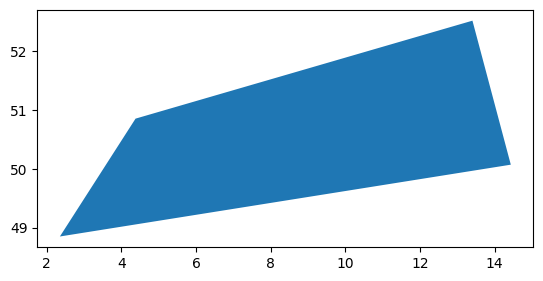

In [166]:
# https://gis.stackexchange.com/questions/294206/%D0%A1reating-polygon-from-coordinates-in-geopandas
from shapely.geometry import Polygon

lat_point_list = [50.854457, 52.518172, 50.072651, 48.853033, 50.854457]
lon_point_list = [4.377184, 13.407759, 14.435935, 2.349553, 4.377184]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = geopandas.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])       

polygon.plot()
#polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
#polygon.to_file(filename='polygon.gpkg', driver="GPKG")
#polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")


In [167]:
firms_df[0:2]

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME  \
99190   49.12006   34.71819      338.90  0.51   0.49 2021-03-29     0942   
224768  52.55190   39.57512      305.57  0.52   0.42 2021-09-04     2305   

       SATELLITE INSTRUMENT CONFIDENCE  BRIGHT_T31    FRP DAYNIGHT  \
99190        N20      VIIRS          n      288.40   4.50        D   
224768         N      VIIRS          n      277.77  10.12        N   

                         geometry        ACQ_DATETIME  
99190   POINT (34.71819 49.12006) 2021-03-29 09:42:00  
224768   POINT (39.57512 52.5519) 2021-09-04 23:05:00

In [168]:
import shapely 

In [169]:
def get_rect_dims(rect): 
    """
    Calculation the height and width of parallelogram with sides running parallel to 
    the x and y axis. Returns tuple of (h, w)
    """
    xx,yy = rect.exterior.coords.xy
    h = xx[0] - xx[2]
    w = yy[0] - yy[2]
    return (h,w)

In [170]:
coords = [ (0.5,0.5),(0.5,-0.5),(-0.5,-0.5),(-0.5,0.5),(0.5,0.5) ]
p = shapely.Polygon(coords) 

In [171]:
get_rect_dims(p) 

(1.0, 1.0)

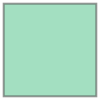

In [172]:
p

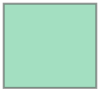

In [173]:
p = shapely.affinity.scale(p, xfact=0.44, yfact=0.4, origin='center') 
p

In [174]:
get_rect_dims(p) 

(0.44, 0.4)

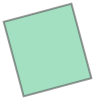

In [175]:
p = shapely.affinity.rotate(p, -75, origin='center') 
p

In [176]:
def get_degrees_per_km():
    km_per_degree = 111.1
    degree_per_km = 1/km_per_degree
    degree_per_km

def make_firms_ukraine_pixel(scan, track, lat, long, angle=-90, km_per_dd_lat=111, km_per_dd_lng=75): 
    """
    Given the scan, track and centerpoint of a FIRMS detection, emit a polygon that 
    represents the geometry for someplace in Ukraine. The scan and track are used to
    offset increments of  decimal degrees to set the corners of the polygon, rotated
    by the provided angle. 

    This is a crude method, because 
    a) we presume using a single scaling factor to map scan/track distances 
    into coordinate changes (and in the case of longitude, that could be off
    by 5% or more depending on the latitude 
    b) we are not considering the effect of elevation.
    c) it is not clear from the documentation on the NASA imagers what the orientation 
    of the track direction is with respect to north. if it varies, it would presumably 
    materialize in the data feed. since it doesn't, we are presuming the 4-5 spacecraft
    which are carrying these imagers are tracking across the same roughly north/south 
    path... if we later figure out how to determine the track angle with respect to north, 
    adjust the angle here as needed on a per-spacecraft or per-pass basis. 

    Notes: 
    - we would need to implement at least a latitude-dependent distance calculator
    to remove the error. That said, for the Ukraine, and for our purposes, you 
    can accept the fixed default here which is close, or provide your own value. 
    See https://edwilliams.org/gccalc.htm for a useful tool if you're hand-jamming 
    the km_per_dd_lng parameter. 
    - all operations are done in a 2d cartesian coordinate system, angle 
    of zero is along the positive x axis, aka east
    - FIRMS scan/track values are (and must be) in units of kilometers
    """
    # Whip up our distance conversion constants
    dd_per_km_lat = 1/km_per_dd_lat
    dd_per_km_lng = 1/km_per_dd_lng
    
    # Create a unit parallelogram and scale/rotate to represent the pixel
    coords = [ (0.5,0.5),(0.5,-0.5),(-0.5,-0.5),(-0.5,0.5),(0.5,0.5) ]
    p = shapely.Polygon(coords) 
    p = shapely.affinity.scale(p, xfact=track, yfact=scan, origin='center') 
    assert(get_rect_dims(p) == (track, scan))
    p = shapely.affinity.rotate(p, angle, origin='center') 

    # Map the parallelogram into GPS coordinates
    p = shapely.affinity.scale(p, xfact=dd_per_km_lng, yfact=dd_per_km_lat, origin='center')
    p = shapely.affinity.translate(p, xoff=long, yoff=lat) 
    return p 

def test_firms_pixel(): 
    track = 0.7
    scan = 0.35
    p = make_firms_pixel(scan, track, 0, 0, angle=0)     
    assert(get_rect_dims(p) == (track, scan))
    

In [177]:
firms_ukraine_df[0:3]

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME  \
99190   49.12006   34.71819      338.90  0.51   0.49 2021-03-29     0942   
179651  50.54336   26.25998      313.03  0.44   0.62 2021-07-28     2318   
61404   49.93162   37.69037      330.06  0.58   0.52 2024-06-01     1058   

       SATELLITE INSTRUMENT CONFIDENCE  BRIGHT_T31   FRP DAYNIGHT  \
99190        N20      VIIRS          n      288.40  4.50        D   
179651         N      VIIRS          n      280.49  1.84        N   
61404        N21      VIIRS          n      299.46  9.14        D   

                         geometry        ACQ_DATETIME  
99190   POINT (34.71819 49.12006) 2021-03-29 09:42:00  
179651  POINT (26.25998 50.54336) 2021-07-28 23:18:00  
61404   POINT (37.69037 49.93162) 2024-06-01 10:58:00

In [178]:
firms_ukraine_df['PIXEL'] = firms_ukraine_df.apply(lambda x: make_firms_ukraine_pixel(x['SCAN'], x['TRACK'], x['LATITUDE'], x['LONGITUDE']), axis='columns')

<Axes: >

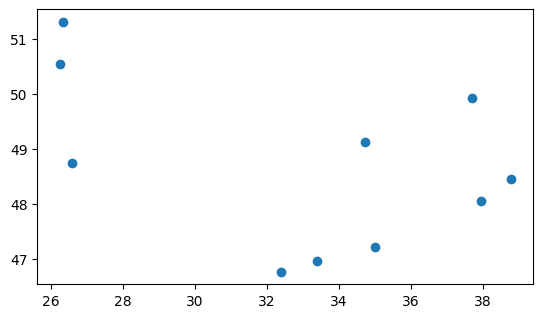

In [179]:
firms_ukraine_df[0:10].plot()

In [180]:
firms_ukraine_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [181]:
firms_ukraine_df.set_geometry('PIXEL', inplace=True) 

In [182]:
_ = firms_ukraine_df.set_crs(4326, inplace=True) 

In [183]:
firms_ukraine_df.drop('geometry', axis='columns', inplace=True) 

Have seen that setting new geometry can cause the CRS to drop, ensure it's here!

In [184]:
assert(firms_ukraine_df.crs != None)

<Axes: >

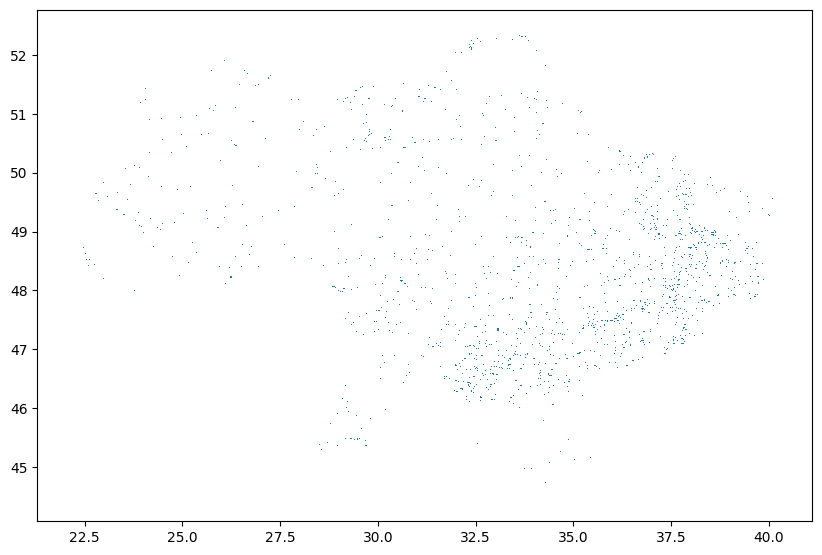

In [185]:
firms_ukraine_df.plot(figsize=(10,10))

In [186]:
firms_ukraine_df.head()

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME  \
99190   49.12006   34.71819      338.90  0.51   0.49 2021-03-29     0942   
179651  50.54336   26.25998      313.03  0.44   0.62 2021-07-28     2318   
61404   49.93162   37.69037      330.06  0.58   0.52 2024-06-01     1058   
554960  48.46292   38.77892      340.47  0.56   0.52 2023-08-19     0925   
434720  48.05919   37.95206      307.15  0.40   0.60 2022-09-14     2235   

       SATELLITE INSTRUMENT CONFIDENCE  BRIGHT_T31   FRP DAYNIGHT  \
99190        N20      VIIRS          n      288.40  4.50        D   
179651         N      VIIRS          n      280.49  1.84        N   
61404        N21      VIIRS          n      299.46  9.14        D   
554960         N      VIIRS          n      303.27  9.13        D   
434720         N      VIIRS          n      282.30  1.08        N   

              ACQ_DATETIME                                              PIXEL  
99190  2021-03-29 09:42:00  POLYGON ((34.72159 49.11785, 34.71479 49.11785...  
179651 2021-07-28 23:18:00  POLYGON ((26.26291 50.54057, 26.25705 50.54057...  
61404  2024-06-01 10:58:00  POLYGON ((37.69424 49.92928, 37.6865 49.92928,...  
554960 2023-08-19 09:25:00  POLYGON ((38.78265 48.46058, 38.77519 48.46058...  
434720 2022-09-14 22:35:00  POLYGON ((37.95473 48.05649, 37.94939 48.05649...

❗️ Feature provenance - for every feature that's added to the dataset, I need to include a rationale and an algorithm, perhaps also a prefix for those columns so attribution is obvious 

In [187]:
firms_ukraine_df.rename(columns={'PIXEL':'geometry'}, inplace=True)

In [188]:
firms_ukraine_df.set_geometry('geometry', inplace=True)

In [189]:
firms_ukraine_df.head(1)

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME  \
99190  49.12006   34.71819       338.9  0.51   0.49 2021-03-29     0942   

      SATELLITE INSTRUMENT CONFIDENCE  BRIGHT_T31  FRP DAYNIGHT  \
99190       N20      VIIRS          n       288.4  4.5        D   

             ACQ_DATETIME                                           geometry  
99190 2021-03-29 09:42:00  POLYGON ((34.72159 49.11785, 34.71479 49.11785...

In [190]:
events_shapes_gdf.head(1)

geometry event_id_cnty  \
392  MULTIPOLYGON (((33.36561 45.24903, 33.36591 45...     UKR164566   

    event_date       disorder_type                  event_type  \
392 2024-06-23  Political violence  Explosions/Remote violence   

                        sub_event_type    location  latitude  longitude  \
392  Shelling/artillery/missile attack  Yevpatoria   45.1928    33.3674   

     geo_precision  adm_name_en adm_name_ua  
392              2  Yevpatoriia   Євпаторія

## Labeling 

This is fundamentally an effort to develop a dataset that could enable us to answer the question: can conflict events in Ukraine be predicted by NASA FIRMS thermal anomaly data? Accordingly, we aim to provide a label for a maximal number of thermal anomalies that indicate whether they coincided with a conflict event. We have the following labels: 
1. event : a conflict event was correlated with the anomaly
2. no-event : a conflict event was not correlate with the anomaly

---- 

Of course we have no ground-truth here. It's not knowable whether any of the thermal anomalies are definitively tied to a strike or ongoing battle. But, maybe it doesn't matter. If we can find a way to predict the presence of conflict based on the thermal anomaly characteristics, then there is by definition a useful correlation there. As the goal is ultimately to predict conflict from thermal measurements (and not the other way around), it seems perhaps the points we are labeling here are the thermal anomalies, with the label being 0 or more geospatially/temporally coincident events. 

- Things that are wrong with this I should have an idea how to explain:
    - An event could have occurred, and driven thermal anomalies, but not been reported in the ACLED data. This is the general problem of having inadequate observations to achieve some statistical significance with a study. Because we don't know the actual number of events that we are trying to study, we are not really able to compute statistical power necessary. Are the ACLED events 50% of reported events, 0.05%?  Are the thermal anomalies that are theoretically detectable 0.1%, 22% or 0.005% of those reported events? To what degree are the actual detected anomalies a subset of the potentially detectable events? 
    - A thermal anomaly motivated by conflict could have occurred, with no ACLED reporting to match
    - Seasonal  or non-conflict fires will be reprsented in this data, but because we cannot disambiguate from those induced by conflict events without event data, we cannot apply a label
    - The event could have occurred as advertised in the ACLED data, but no thermal data - this is safely ignored since we're trying to predict activity by thermal anomalies
    - The event could have occurred, and generated a thermal anomaly but not been collected due to overflight timing or weather, or because the fire was too small to be detected, or because there was no fire at all ! - also probably safe to ignore this, we're constraining the dataset and the analysis to detections
        - BUT what do we do with ACLED events that have no thermal information? it's not a false negative per se, at least because of the overflight and the sensor sensitivity problems. i think we have to discard these. This would leave us with only true positives to train a model on. "there's an anomaly and look, there's a conflict event associated!" -- ridiculous, the model would just learn to return True every time 
        - We have to have true negatives, our only option here due to the confounded of weather is to incorporate all thermal anomalies before the war started and assert that effectively zero of those were the result of conflict events --
        - test/train split would have to straddle this temporal boundary, which could have all sorts of other issues associated -- hot year/dry year vs cold/rainy -- it's the best we've got
    - For all of the above reasons, we crutch on thermal anomalies that occurred prior to the most recent stage of this conflict when Russia invaded Ukraine. While we introduce more confounders like annual fluctuations in temperature or fire

Models: 
 - May need to ingest multiple events, or work process as a time series, to improve likelihood of predicting conflict event. 

### Join event data with thermal anomalies

We now have polygons for all events and polygons for all thermal anomalies for almost four years. We can now label all anomalies with events they are potentially associated with to set the stage for experimenation with classification tasks. Note that anomalies must not just intersection spatially but temporarlly to receive a label and be included in the dataset. See logic above. 

Temporal correlation presents a challenge here, as we must make a determination as to the valid window to accept a thermal anomayy around the conflict event. Conflict events have a day-level resolution, and the ACLED data isn't clear whether they've attempted to map these into GMT or some other consistent timezone. We are left to presume that these are reported based on the Ukraine-local timezone, which was 1-2 hours (EEST or EET respectively) ahead of GMT for the duration of these observations. This presents another problem, as events being reported in the early morning hours ukraine local time would be one day ahead of associated thermal anomalies, since they are reported in GMT. The day-level granularity motivates us to associated thermal anomalies that are collocated with an event up to 3 hours *before* they were reported. Conversely, conflict events can induce smoldering fires in structures or wooden areas that continue well after the event and can be detected well after an event. For this reason, we also associate thermal anomalies that are collocated with an event if the former occurs up to 1 day after the latter. This heuristic is rather primitive, but seems warrnated given the constraints of the event reporting resolution. 

❗️ how do we apply this three-day window to the spatial join???
- one-shot logic is elusive 
- maybe we don't? we can join everything spatially, ignoring the temporal component and then go back and filter with a more robust algorithm
    - anomaly can be detected up to 3h before the day of
    - anomaly can be detected up to 24h after the event is reported
    - ... but not filtering by time could create an explosive number of copies during the join operation... 1000 events in kiev x 1000 fire detections, only 10 of which might coincide temporally would result in 1,000,000 rows!!!
- well, we could split this problem
    - join coarsely, then
    - go back after and remove rows where the 3h criteria isn't met
    - or do three spatial joins with the event_date as the criteria, then reunite
- what geometry are we keeping?
    - both!

The spatial join accepts an `on_attribute` argument which gives us the ability to apply a second criteria (in addition) to the spatial overlap we're implicitly enforcing. I guess we'll need to create a date field for the nasa data, and then have the join restrict joins to where that field matches the ACLED event date? 

In [191]:
firms_ukraine_df.rename(columns={'ACQ_DATE':'obs_date'}, inplace=True)
events_shapes_gdf.rename(columns={'event_date':'obs_date'}, inplace=True)

Create a bootleg shape column so we don't lose the administrative boundary during the join... 

In [192]:
events_shapes_gdf['admin_shape'] = events_shapes_gdf['geometry']

In [193]:
firms_ukraine_df.head(1) 

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   obs_date ACQ_TIME  \
99190  49.12006   34.71819       338.9  0.51   0.49 2021-03-29     0942   

      SATELLITE INSTRUMENT CONFIDENCE  BRIGHT_T31  FRP DAYNIGHT  \
99190       N20      VIIRS          n       288.4  4.5        D   

             ACQ_DATETIME                                           geometry  
99190 2021-03-29 09:42:00  POLYGON ((34.72159 49.11785, 34.71479 49.11785...

In [194]:
events_shapes_gdf.head(1) 

geometry event_id_cnty  \
392  MULTIPOLYGON (((33.36561 45.24903, 33.36591 45...     UKR164566   

      obs_date       disorder_type                  event_type  \
392 2024-06-23  Political violence  Explosions/Remote violence   

                        sub_event_type    location  latitude  longitude  \
392  Shelling/artillery/missile attack  Yevpatoria   45.1928    33.3674   

     geo_precision  adm_name_en adm_name_ua  \
392              2  Yevpatoriia   Євпаторія   

                                           admin_shape  
392  MULTIPOLYGON (((33.36561 45.24903, 33.36591 45...

In [195]:
firms_ukraine_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [266]:
events_shapes_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Doing a spatial join with the attribute constraint is pretty slow. Optimize by: 
1. Segment the FIRMS data prior to the start of the war (February 24, 2022) to avoid the join having to look at the associated geometry
2. 

In [280]:
firms_labeled = geopandas.sjoin(
    firms_ukraine_df, 
    events_shapes_gdf,  
    how='inner', 
    lsuffix='firms', 
    rsuffix='acled',
    on_attribute='obs_date')

In [281]:
firms_labeled.count()

LATITUDE          75
LONGITUDE         75
BRIGHTNESS        75
SCAN              75
TRACK             75
obs_date          75
ACQ_TIME          75
SATELLITE         75
INSTRUMENT        75
CONFIDENCE        75
BRIGHT_T31        75
FRP               75
DAYNIGHT          75
ACQ_DATETIME      75
geometry          75
index_acled       75
event_id_cnty     75
disorder_type     75
event_type        75
sub_event_type    75
location          75
latitude          75
longitude         75
geo_precision     75
adm_name_en       75
adm_name_ua       75
admin_shape       75
dtype: int64

In [282]:
firms_labeled.explore(figsize=(15,15))

In [283]:
firms_labeled.set_geometry('admin_shape', inplace=True) 

In [284]:
firms_labeled.columns

Index(['LATITUDE', 'LONGITUDE', 'BRIGHTNESS', 'SCAN', 'TRACK', 'obs_date',
       'ACQ_TIME', 'SATELLITE', 'INSTRUMENT', 'CONFIDENCE', 'BRIGHT_T31',
       'FRP', 'DAYNIGHT', 'ACQ_DATETIME', 'geometry', 'index_acled',
       'event_id_cnty', 'disorder_type', 'event_type', 'sub_event_type',
       'location', 'latitude', 'longitude', 'geo_precision', 'adm_name_en',
       'adm_name_ua', 'admin_shape'],
      dtype='object')

In [285]:
firms_labeled.rename(columns={
    'LATITUDE': 'f_lat',
    'LONGITUDE': 'f_lng', 
    'BRIGHTNESS': 'f_bright',
    'SCAN': 'f_scan', 
    'TRACK': 'f_track', 
    'obs_date': 'date',
    'ACQ_TIME': 'f_acqtime', 
    'SATELLITE': 'f_sat', 
    'INSTRUMENT': 'f_inst',  
    'CONFIDENCE': 'f_conf',
    'BRIGHT_T31': 'f_bright31', 
    'FRP': 'f_frp',
    'DAYNIGHT': 'f_daynight',  
    'ACQ_DATETIME': 'f_datetime',
    #'geometry': 'firms_pixel', # geopandas sometimes struggles with names other than 'geometry' for the active geometry, leave it alone
    'index_acled': 'a_index',
    'event_id_cnty': 'a_event_id', 
    'disorder_type': 'a_type',
    'event_type': 'a_event', 
    'sub_event_type': 'a_subevent',
    'location': 'a_location', 
    'latitude': 'a_lat', 
    'longitude': 'a_lng',
    'geo_precision': 'a_geoprec', 
    'adm_name_en': 'h_adm_en', 
    'adm_name_ua': 'h_adm_ua',
    'admin_shape' : 'h_adm_shape'
}, inplace=True)

We disconnected the geometry when we renamed the column above, fix... 

In [286]:
firms_labeled.columns

Index(['f_lat', 'f_lng', 'f_bright', 'f_scan', 'f_track', 'date', 'f_acqtime',
       'f_sat', 'f_inst', 'f_conf', 'f_bright31', 'f_frp', 'f_daynight',
       'f_datetime', 'geometry', 'a_index', 'a_event_id', 'a_type', 'a_event',
       'a_subevent', 'a_location', 'a_lat', 'a_lng', 'a_geoprec', 'h_adm_en',
       'h_adm_ua', 'h_adm_shape'],
      dtype='object')

In [287]:
firms_labeled.set_geometry('h_adm_shape', inplace=True) 

<Axes: >

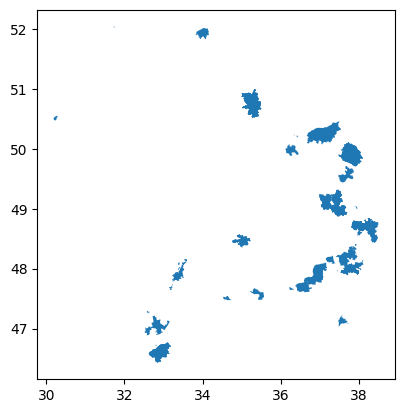

In [288]:
firms_labeled.plot()

In [289]:
firms_labeled.head()

f_lat     f_lng  f_bright  f_scan  f_track       date f_acqtime  \
466107  48.59764  38.02026    338.81    0.38     0.36 2023-03-04      1015   
735596  48.40023  37.89245    321.99    0.40     0.37 2024-06-19      2324   
78590   47.09460  37.55670    314.00    1.30     1.10 2022-03-22      1012   
423071  47.83153  36.82017    303.57    0.48     0.48 2022-08-30      0016   
86485   48.32475  37.82122    302.68    0.59     0.70 2024-07-11      2222   

       f_sat f_inst f_conf  ...              a_type  \
466107     N  VIIRS      n  ...  Political violence   
735596   N20  VIIRS      n  ...  Political violence   
78590   Aqua  MODIS      n  ...  Political violence   
423071     N  VIIRS      n  ...  Political violence   
86485    N21  VIIRS      n  ...  Political violence   

                           a_event                         a_subevent  \
466107                     Battles                        Armed clash   
735596                     Battles                        Armed clash   
78590   Explosions/Remote violence                   Air/drone strike   
423071  Explosions/Remote violence  Shelling/artillery/missile attack   
86485                      Battles                        Armed clash   

         a_location    a_lat    a_lng a_geoprec             h_adm_en  \
466107      Bakhmut  48.5956  37.9999         2              Bakhmut   
735596    Pivnichne  48.3982  37.9175         2            Pivnichne   
78590      Mariupol  47.1298  37.5710         1             Mariupol   
423071  Zelene Pole  47.8300  36.6237         1  Velykonovosilkivska   
86485      New York  48.3319  37.8358         2             Niu-York   

                    h_adm_ua  \
466107                Бахмут   
735596              Північне   
78590              Маріуполь   
423071  Великоновосілківська   
86485               Нью-Йорк   

                                              h_adm_shape  
466107  MULTIPOLYGON (((38.01205 48.56278, 38.01219 48...  
735596  MULTIPOLYGON (((37.93559 48.40111, 37.93798 48...  
78590   MULTIPOLYGON (((37.64985 47.13529, 37.65 47.13...  
423071  MULTIPOLYGON (((37.0773 47.93337, 37.07725 47....  
86485   MULTIPOLYGON (((37.83724 48.34719, 37.83971 48...  

[5 rows x 27 columns]

## Export 

In [290]:
import os

In [291]:
export_dir = 'export'

In [296]:
def write_fud(fud_df, path, type='shapefile'): 
    """
    Write a geodataframe as a shapefile
    """ 
    success = False
    match type: 
        # shapefiles can't handle multiple geometry types, so we need to drop 
        # something. Here we chuck the FIRMS pixel as it can be reconstituted 
        # from the track/scan/point geometry
        case 'shapefile': 
            one_shape = fud_df.drop('geometry', axis='columns')
            print(one_shape.columns)
            one_shape.to_file(os.path.join(path,'fud.shp'))
            success = True
        case _:
            pass

    return success

In [297]:
os.makedirs(export_dir, exist_ok=True)

In [298]:
write_fud(firms_labeled, export_dir)

Index(['f_lat', 'f_lng', 'f_bright', 'f_scan', 'f_track', 'date', 'f_acqtime',
       'f_sat', 'f_inst', 'f_conf', 'f_bright31', 'f_frp', 'f_daynight',
       'f_datetime', 'a_index', 'a_event_id', 'a_type', 'a_event',
       'a_subevent', 'a_location', 'a_lat', 'a_lng', 'a_geoprec', 'h_adm_en',
       'h_adm_ua', 'h_adm_shape'],
      dtype='object')


/var/folders/t0/vjz2r6l1155639x6cpfr8z3h0000gn/T/ipykernel_7830/195280886.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  one_shape.to_file(os.path.join(path,'fud.shp'))
/Users/jason/Local/school/venv/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field date create as date field, though DateTime requested.
  ogr_write(
/Users/jason/Local/school/venv/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field f_datetime create as date field, though DateTime requested.
  ogr_write(


True

In [215]:
firms_labeled.to_file??

Signature:
firms_labeled.to_file(
    filename,
    driver=None,
    schema=None,
    index=None,
    **kwargs,
)
Source:   
    def to_file(self, filename, driver=None, schema=None, index=None, **kwargs):
        """Write the ``GeoDataFrame`` to a file.

        By default, an ESRI shapefile is written, but any OGR data source
        supported by Pyogrio or Fiona can be written. A dictionary of supported OGR
        providers is available via:

        >>> import pyogrio
        >>> pyogrio.list_drivers()  # doctest: +SKIP

        Parameters
        ----------
        filename : string
            File path or file handle to write to. The path may specify a
            GDAL VSI scheme.
        driver : string, default None
            The OGR format driver used to write the vector file.
            If not specified, it attempts to infer it from the file extension.
            If no extension is specified, it saves ESRI Shapefile to a folder.
        schema : dict, default None
     

We'll create this in a few different formats to ease consumption. Most seem to require fiona import. 

- CSV?
- KML
    - gdf.to_file('test.kml', driver='KML')
- Shapefile?
    - dataframe.to_file("output") 
- GeoJSON:
    - dataframe.to_file("output.json", driver="GeoJSON")
- GeoPackage: 
    - dataframe.to_file("output.gpkg", driver="GPKG")

❗️ todo write pytest routines that create the dataset and test that it loads in multiple different formats